# Temperature Forecast Project using ML

Project Description

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

Attribute Information:

For more information, read [Cho et al, 2020].

1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.

Dataset Link-

https://github.com/dsrscientist/Dataset2/blob/main/temperature.csv


## Importing Libraries

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Loading dataset

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv")
df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

# EDA

## Statical Analysis

In [3]:
df.shape

(7752, 25)

We have 7752 rows and 25 columns in our dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


From the above code we have found that float64(24), Object(1) and it consume memory usage: 1.5+ MB, We have null values in our dataset.  

In [5]:
df.nunique().to_frame()

0
station             25
Date               310
Present_Tmax       167
Present_Tmin       155
LDAPS_RHmin       7672
LDAPS_RHmax       7664
LDAPS_Tmax_lapse  7675
LDAPS_Tmin_lapse  7675
LDAPS_WS          7675
LDAPS_LH          7675
LDAPS_CC1         7569
LDAPS_CC2         7582
LDAPS_CC3         7599
LDAPS_CC4         7524
LDAPS_PPT1        2812
LDAPS_PPT2        2510
LDAPS_PPT3        2356
LDAPS_PPT4        1918
lat                 12
lon                 25
DEM                 25
Slope               27
Solar radiation   1575
Next_Tmax          183
Next_Tmin          157

Checking the unique values in dataset Most of the columns are continues data.

In [6]:
df.isna().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

We have  null values in these columns 

In [7]:
# Set the Pandas display options to show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


df.describe(include='all')

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
count   7750.000000        7750   7682.000000   7682.000000  7677.000000   
unique          NaN         310           NaN           NaN          NaN   
top             NaN  30-06-2013           NaN           NaN          NaN   
freq            NaN          25           NaN           NaN          NaN   
mean      13.000000         NaN     29.768211     23.225059    56.759372   
std        7.211568         NaN      2.969999      2.413961    14.668111   
min        1.000000         NaN     20.000000     11.300000    19.794666   
25%        7.000000         NaN     27.800000     21.700000    45.963543   
50%       13.000000         NaN     29.900000     23.400000    55.039024   
75%       19.000000         NaN     32.000000     24.900000    67.190056   
max       25.000000         NaN     37.600000     29.900000    98.524734   

        LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS  \
count   7677.000000       7677.000000       7677.000000  7677.000000   
unique          NaN               NaN               NaN          NaN   
top             NaN               NaN               NaN          NaN   
freq            NaN               NaN               NaN          NaN   
mean      88.374804         29.613447         23.512589     7.097875   
std        7.192004          2.947191          2.345347     2.183836   
min       58.936283         17.624954         14.272646     2.882580   
25%       84.222862         27.673499         22.089739     5.678705   
50%       89.793480         29.703426         23.760199     6.547470   
75%       93.743629         31.710450         25.152909     8.032276   
max      100.000153         38.542255         29.619342    21.857621   

           LDAPS_LH    LDAPS_CC1    LDAPS_CC2    LDAPS_CC3    LDAPS_CC4  \
count   7677.000000  7677.000000  7677.000000  7677.000000  7677.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean      62.505019     0.368774     0.356080     0.318404     0.299191   
std       33.730589     0.262458     0.258061     0.250362     0.254348   
min      -13.603212     0.000000     0.000000     0.000000     0.000000   
25%       37.266753     0.146654     0.140615     0.101388     0.081532   
50%       56.865482     0.315697     0.312421     0.262555     0.227664   
75%       84.223616     0.575489     0.558694     0.496703     0.499489   
max      213.414006     0.967277     0.968353     0.983789     0.974710   

         LDAPS_PPT1   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat  \
count   7677.000000  7677.000000  7677.000000  7677.000000  7752.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       0.591995     0.485003     0.278200     0.269407    37.544722   
std        1.945768     1.762807     1.161809     1.206214     0.050352   
min        0.000000     0.000000     0.000000     0.000000    37.456200   
25%        0.000000     0.000000     0.000000     0.000000    37.510200   
50%        0.000000     0.000000     0.000000     0.000000    37.550700   
75%        0.052525     0.018364     0.007896     0.000041    37.577600   
max       23.701544    21.621661    15.841235    16.655469    37.645000   

                lon          DEM        Slope  Solar radiation    Next_Tmax  \
count   7752.000000  7752.000000  7752.000000      7752.000000  7725.000000   
unique          NaN          NaN          NaN              NaN          NaN   
top             NaN          NaN          NaN              NaN          NaN   
freq            NaN          NaN          NaN              NaN          NaN   
mean     126.991397    61.867972     

From description:-

1.There are 7752 rows and most of them have some missing values .

2.The std is higher for mean LDAPS_RHmin,LDAPS_WS,LDAPS_LH,LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4,LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4,DEM, and Slope

3.All the minimum value are value and possible

4.The difference between min,25%,50%,75% and max are higher for LDAPS_WS,LDAPS_LH,LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4,DEM, and Slope.


5.The mean value is greater than median (50%) for  LDAPS_WS,LDAPS_LH,LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4,DEM, and Slope which mean data is right skewed.

### Feature Enigneering

In [8]:
# Converting data type from object to datefromate
df['Date'] = pd.to_datetime(df['Date'])
df['Week'] = df['Date'].dt.isocalendar().week
df['Year']=df['Date'].dt.year
df['Month']= df['Date'].dt.month
df.shape

(7752, 28)

Converted the Date which was object dataType to datetime and then extract the Week,Year and Months

In [9]:
# Function to map months to South Korea's seasons
def map_to_season(month):
    if 12 <= month <= 2:
        return 'Winter'
    elif 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Unknown'
    
# Apply the mapping function to create a new column 'season'
df['season'] = df['Month'].apply(map_to_season)

Converting the month into different season for better analysis.

In [10]:
# cereating the new dataframe without Date column as we extracted its information earlier.
df1=df.drop('Date',axis=1)

In [11]:
# Rechecking the shape
df1.shape

(7752, 28)

### Treating the nulls

In [12]:
# We have a large dataset with few null valuea so qwe are going to drop it simply
df1.dropna(inplace=True)

### Checking duplicate

In [13]:
duplicates = df1.duplicated()
print('Number of duplicate rows:', duplicates.sum())

Number of duplicate rows: 0


We have no duplicate in the dataset

In [14]:
# Checking the dataset aftre droping the null
df1.shape

(7588, 28)

In [15]:
data_loss=(7752-7588)/7752
data_loss

0.021155830753353973

Percentage loss in dataset is 2.1% which is acceptable.

Creating the new feature which is difference between max and min temp of the day

In [16]:
df1['Temp_diff']=df1['Next_Tmax']-df1['Next_Tmin']

## Graphical Analysis

### univarent analysis

In [17]:
dfint=df1.drop('season',axis=1)

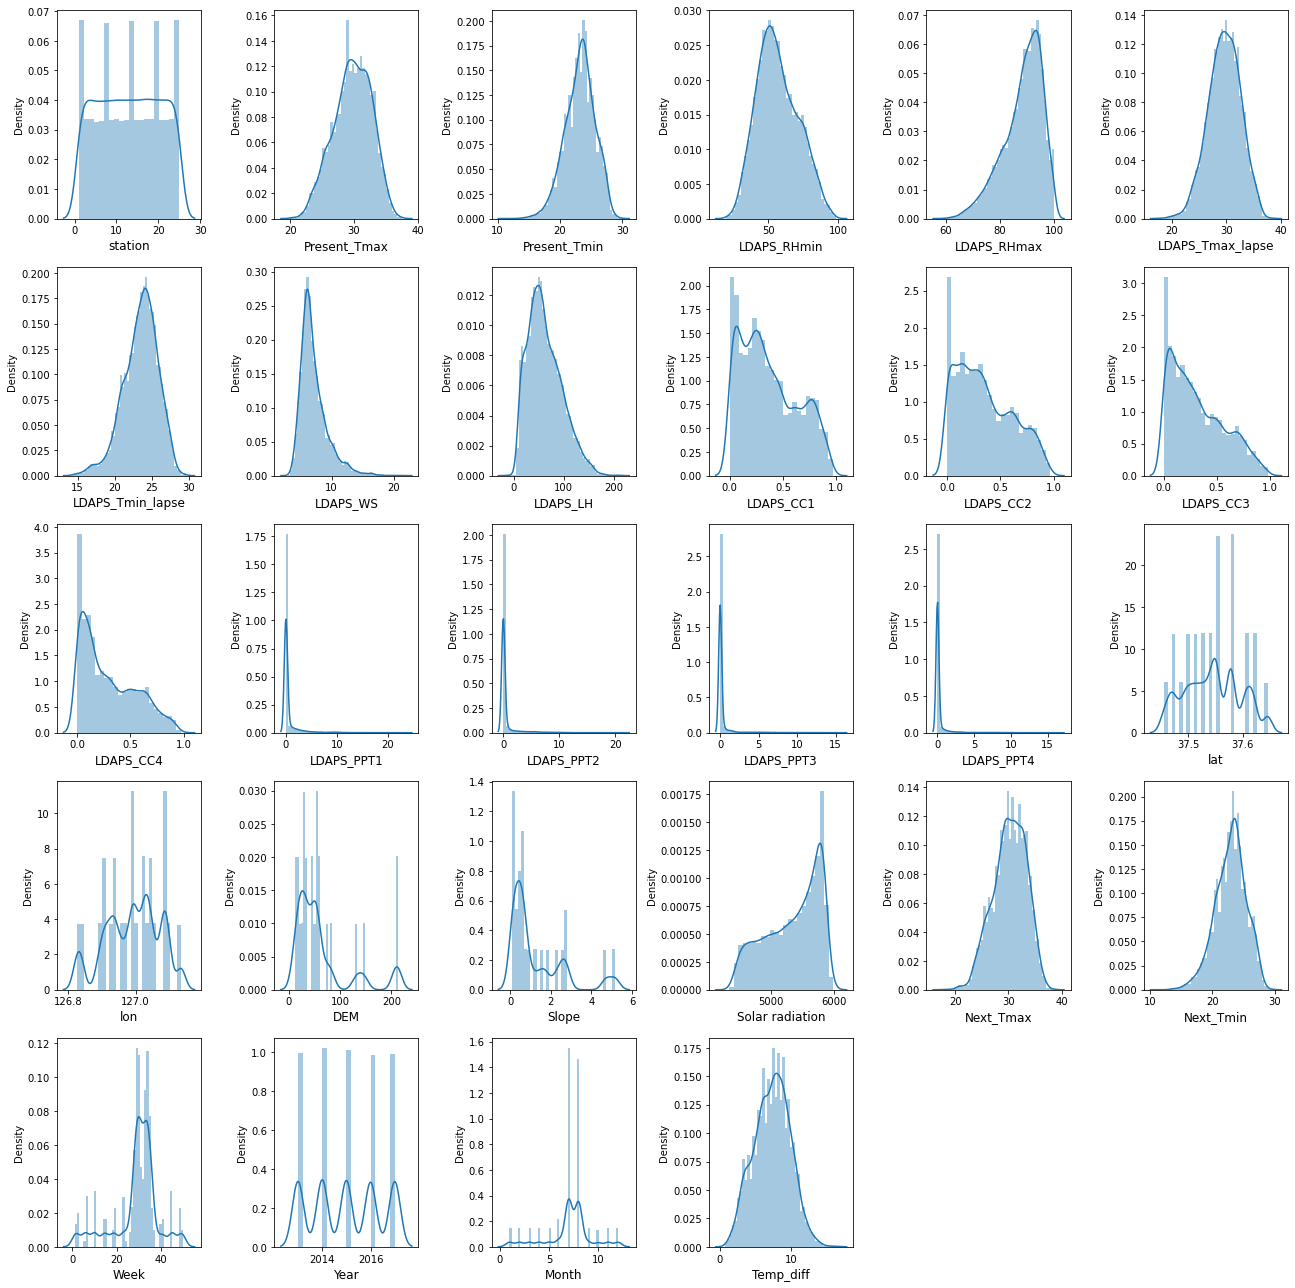

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18,18),facecolor="white")
plotnumber=1
for col in dfint:
    if plotnumber<=29:
        ax=plt.subplot(5,6,plotnumber)
        sns.distplot(dfint[col])
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

from the above graph we can see that LDAPS_RHmin,LDAPS_WS,LDAPS_LH,LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4,LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4,DEM, and Slope are right skewed

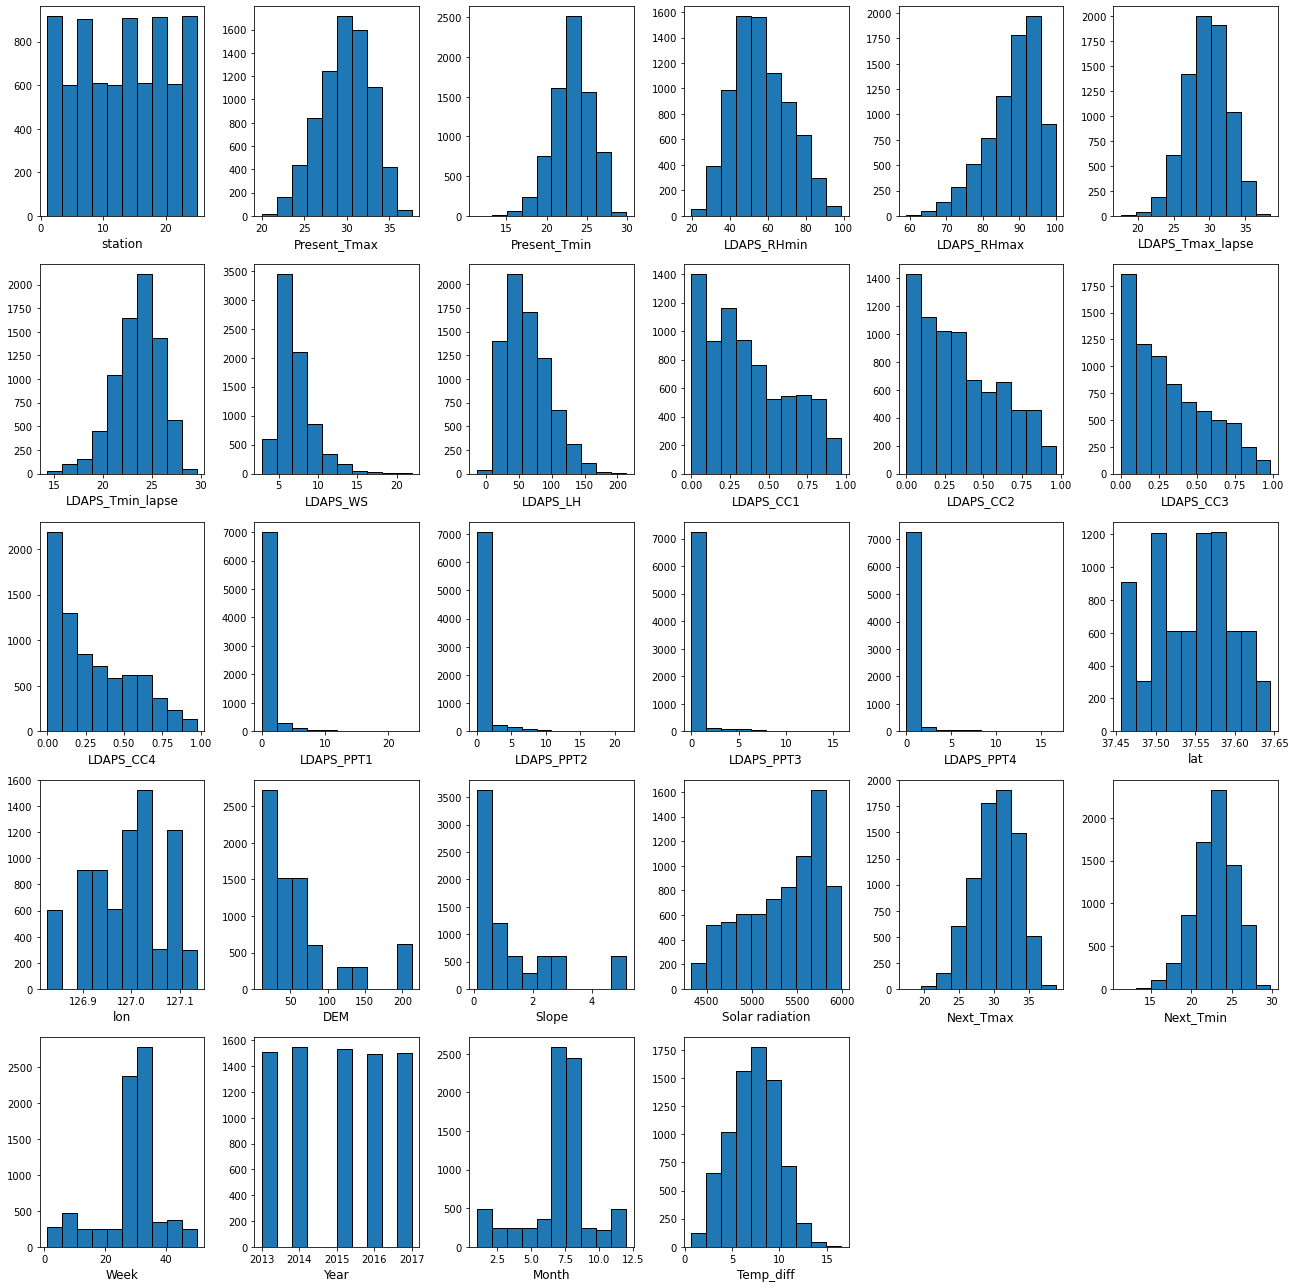

In [19]:
plt.figure(figsize=(18,18),facecolor="white")
plotnumber=1
for col in dfint:
    if plotnumber<=29:
        ax=plt.subplot(5,6,plotnumber)
        plt.hist(dfint[col], bins=10, edgecolor='black')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

From the above graph we can see that 
- station have near 600 and above 800 frequency for distibution.
- Present_Tmax have max value at 30 which is more than 1600
- Present_Tmin have max between 20-25 which is more than 2500
- LDAPS_RHmin max between 40-60 which is more than 1600
- LDAPS_RHmax max between 90-100 which is more than 2000
- LDAPS_Tmax_lapse max between 25-35 which is more than 2000
- LDAPS_Tmin_lapse max between 20-25 which is more than 2000
- LDAPS_WS max between 5-10 which is more than 3500
- LDAPS_LH max between 50-100 which is more than 2000
- LDAPS_CC1 max between 0-0.25 which is more than 1400
- LDAPS_CC2 max between 0-0.25 which is more than 1400
- LDAPS_CC3 max between 0-0.25 which is more than 1750
- LDAPS_CC3 max between 0-0.25 which is more than 2000
- LDAPS_PPT1 max between 0-10 which is more than 7000
- LDAPS_PPT2 max between 0-10 which is more than 7000
- LDAPS_PPT3 max between 0-10 which is more than 7000
- LDAPS_PPT4 max between 0-10 which is more than 7000
- lat max between 37.5-37.6 which is more than 1200
- lon max between 127-127.1 which is more than 1500
- DEM max between 0-50 which is more than 2500
- Slope max between 0-2 which is more than 3500
- Solar radiation max between 5500-6000 which is more than 1600
- Next_Tmax max between 25-30 which is more than 2000
- Next_Tmin max between 20-25 which is more than 2000
- Week max between 20-40 which is more than 2500
- Year max  is more than 1600
- Month max between 5-10 which is more than 2500
- Temp_diff max between 5-10 which is more than 1750

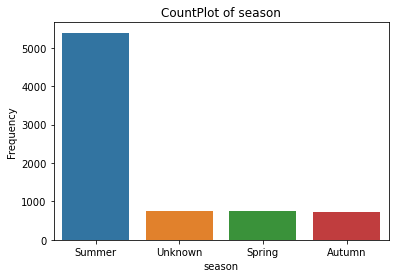

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(df1['season'])
plt.title('CountPlot of season')
plt.xlabel('season')
plt.ylabel('Frequency')
plt.show()


From the above graph we can see that summer have highest value count.

<AxesSubplot:ylabel='season'>

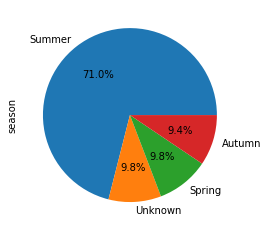

In [21]:
df1['season'].value_counts().plot.pie(autopct='%1.1f%%')

summer is 71 % and other season are below 10%.

### Bi-varient analysis

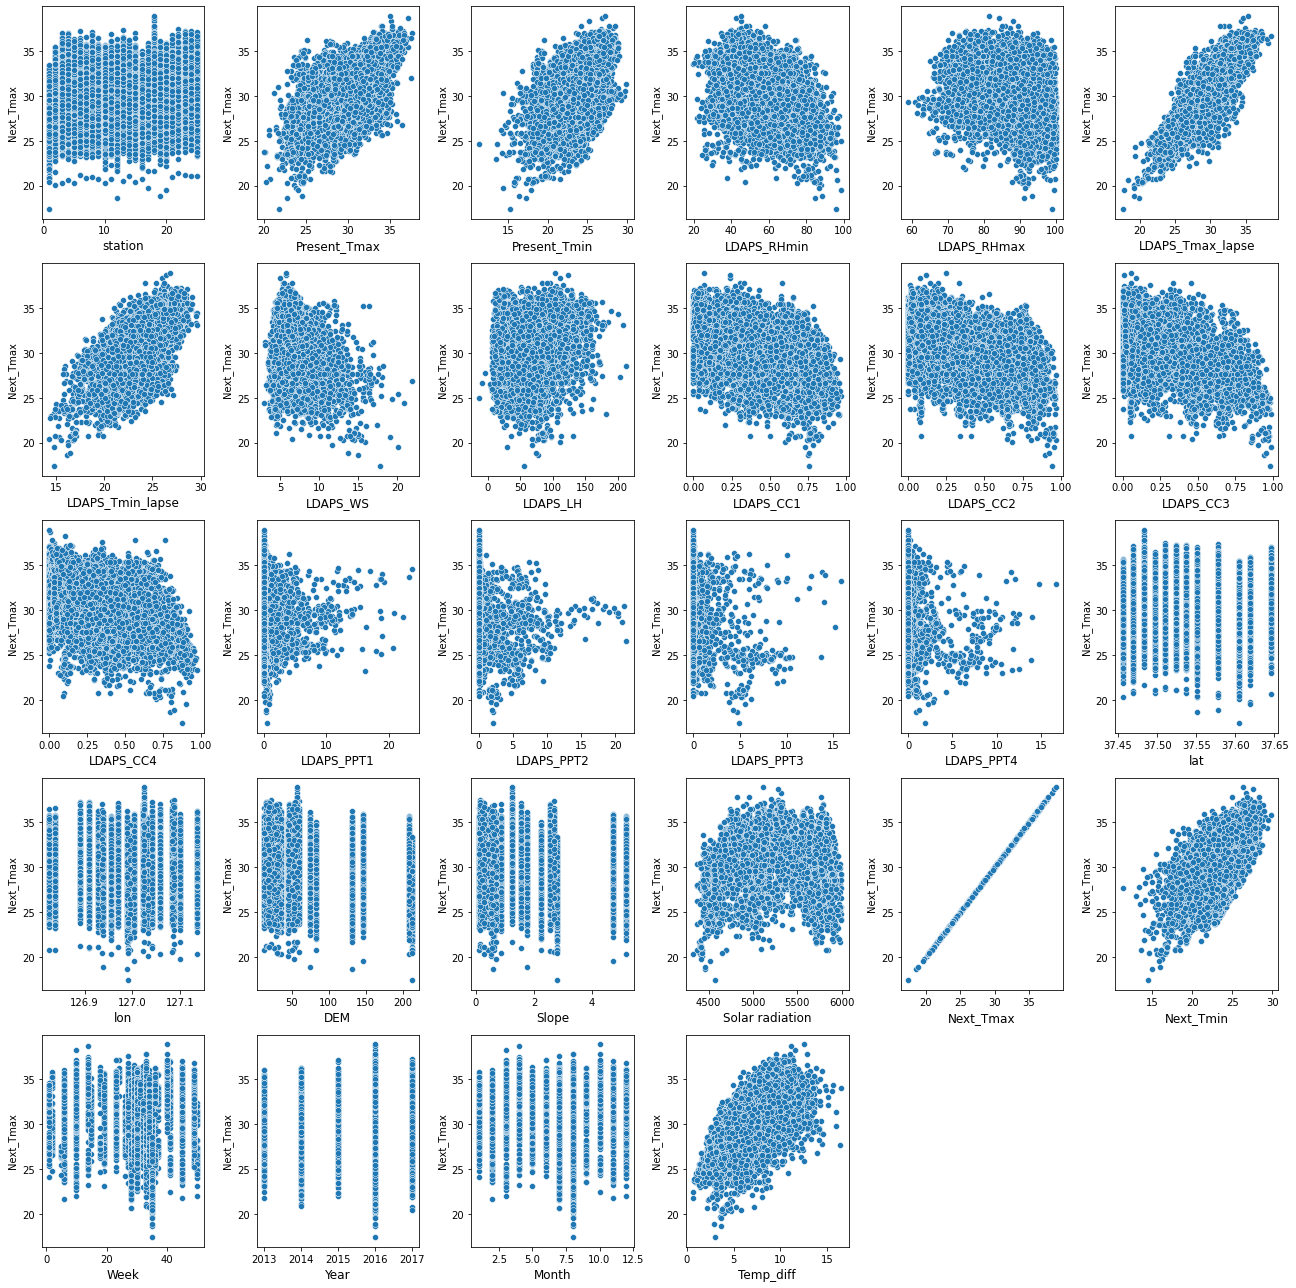

In [22]:
plt.figure(figsize=(18,18),facecolor="white")
plotnumber=1
for col in dfint:
    if plotnumber<=29:
        ax=plt.subplot(5,6,plotnumber)
        sns.scatterplot(dfint[col], df1['Next_Tmax'])
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

from the above graph we can see the trend between
- Next_Tmax vs LDAPS_Tmax_lapse
- Next_Tmax vs Present_Tmax
- Next_Tmax vs Present_Tmin
- Next_Tmax vs LDAPS_Tmin_lapse
- Next_Tmax vs Next_Tmin
- Next_Tmax vs Temp_diff

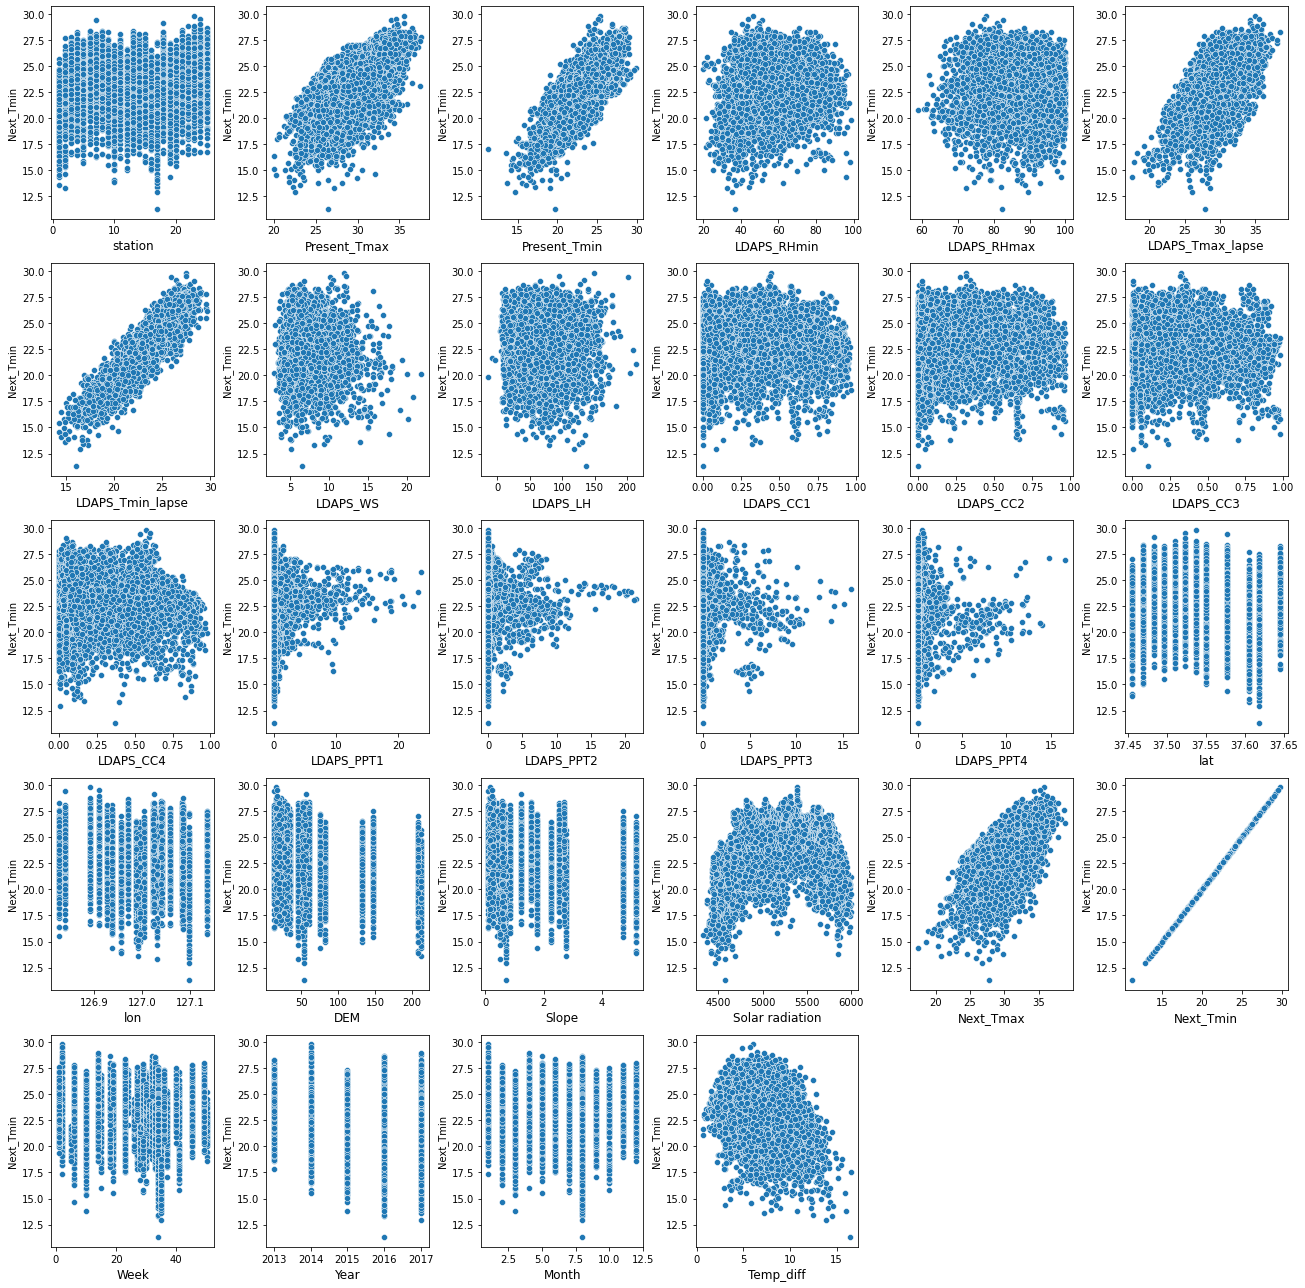

In [23]:
plt.figure(figsize=(18,18),facecolor="white")
plotnumber=1
for col in dfint:
    if plotnumber<=29:
        ax=plt.subplot(5,6,plotnumber)
        sns.scatterplot(dfint[col], df1['Next_Tmin'])
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

from the above graph we can see the trend between
- Next_Tmax vs LDAPS_Tmax_lapse
- Next_Tmax vs Present_Tmax
- Next_Tmax vs Present_Tmin
- Next_Tmax vs LDAPS_Tmin_lapse
- Next_Tmax vs Next_Tmin
- Next_Tmax vs Temp_diff

### Multivarient Analysis

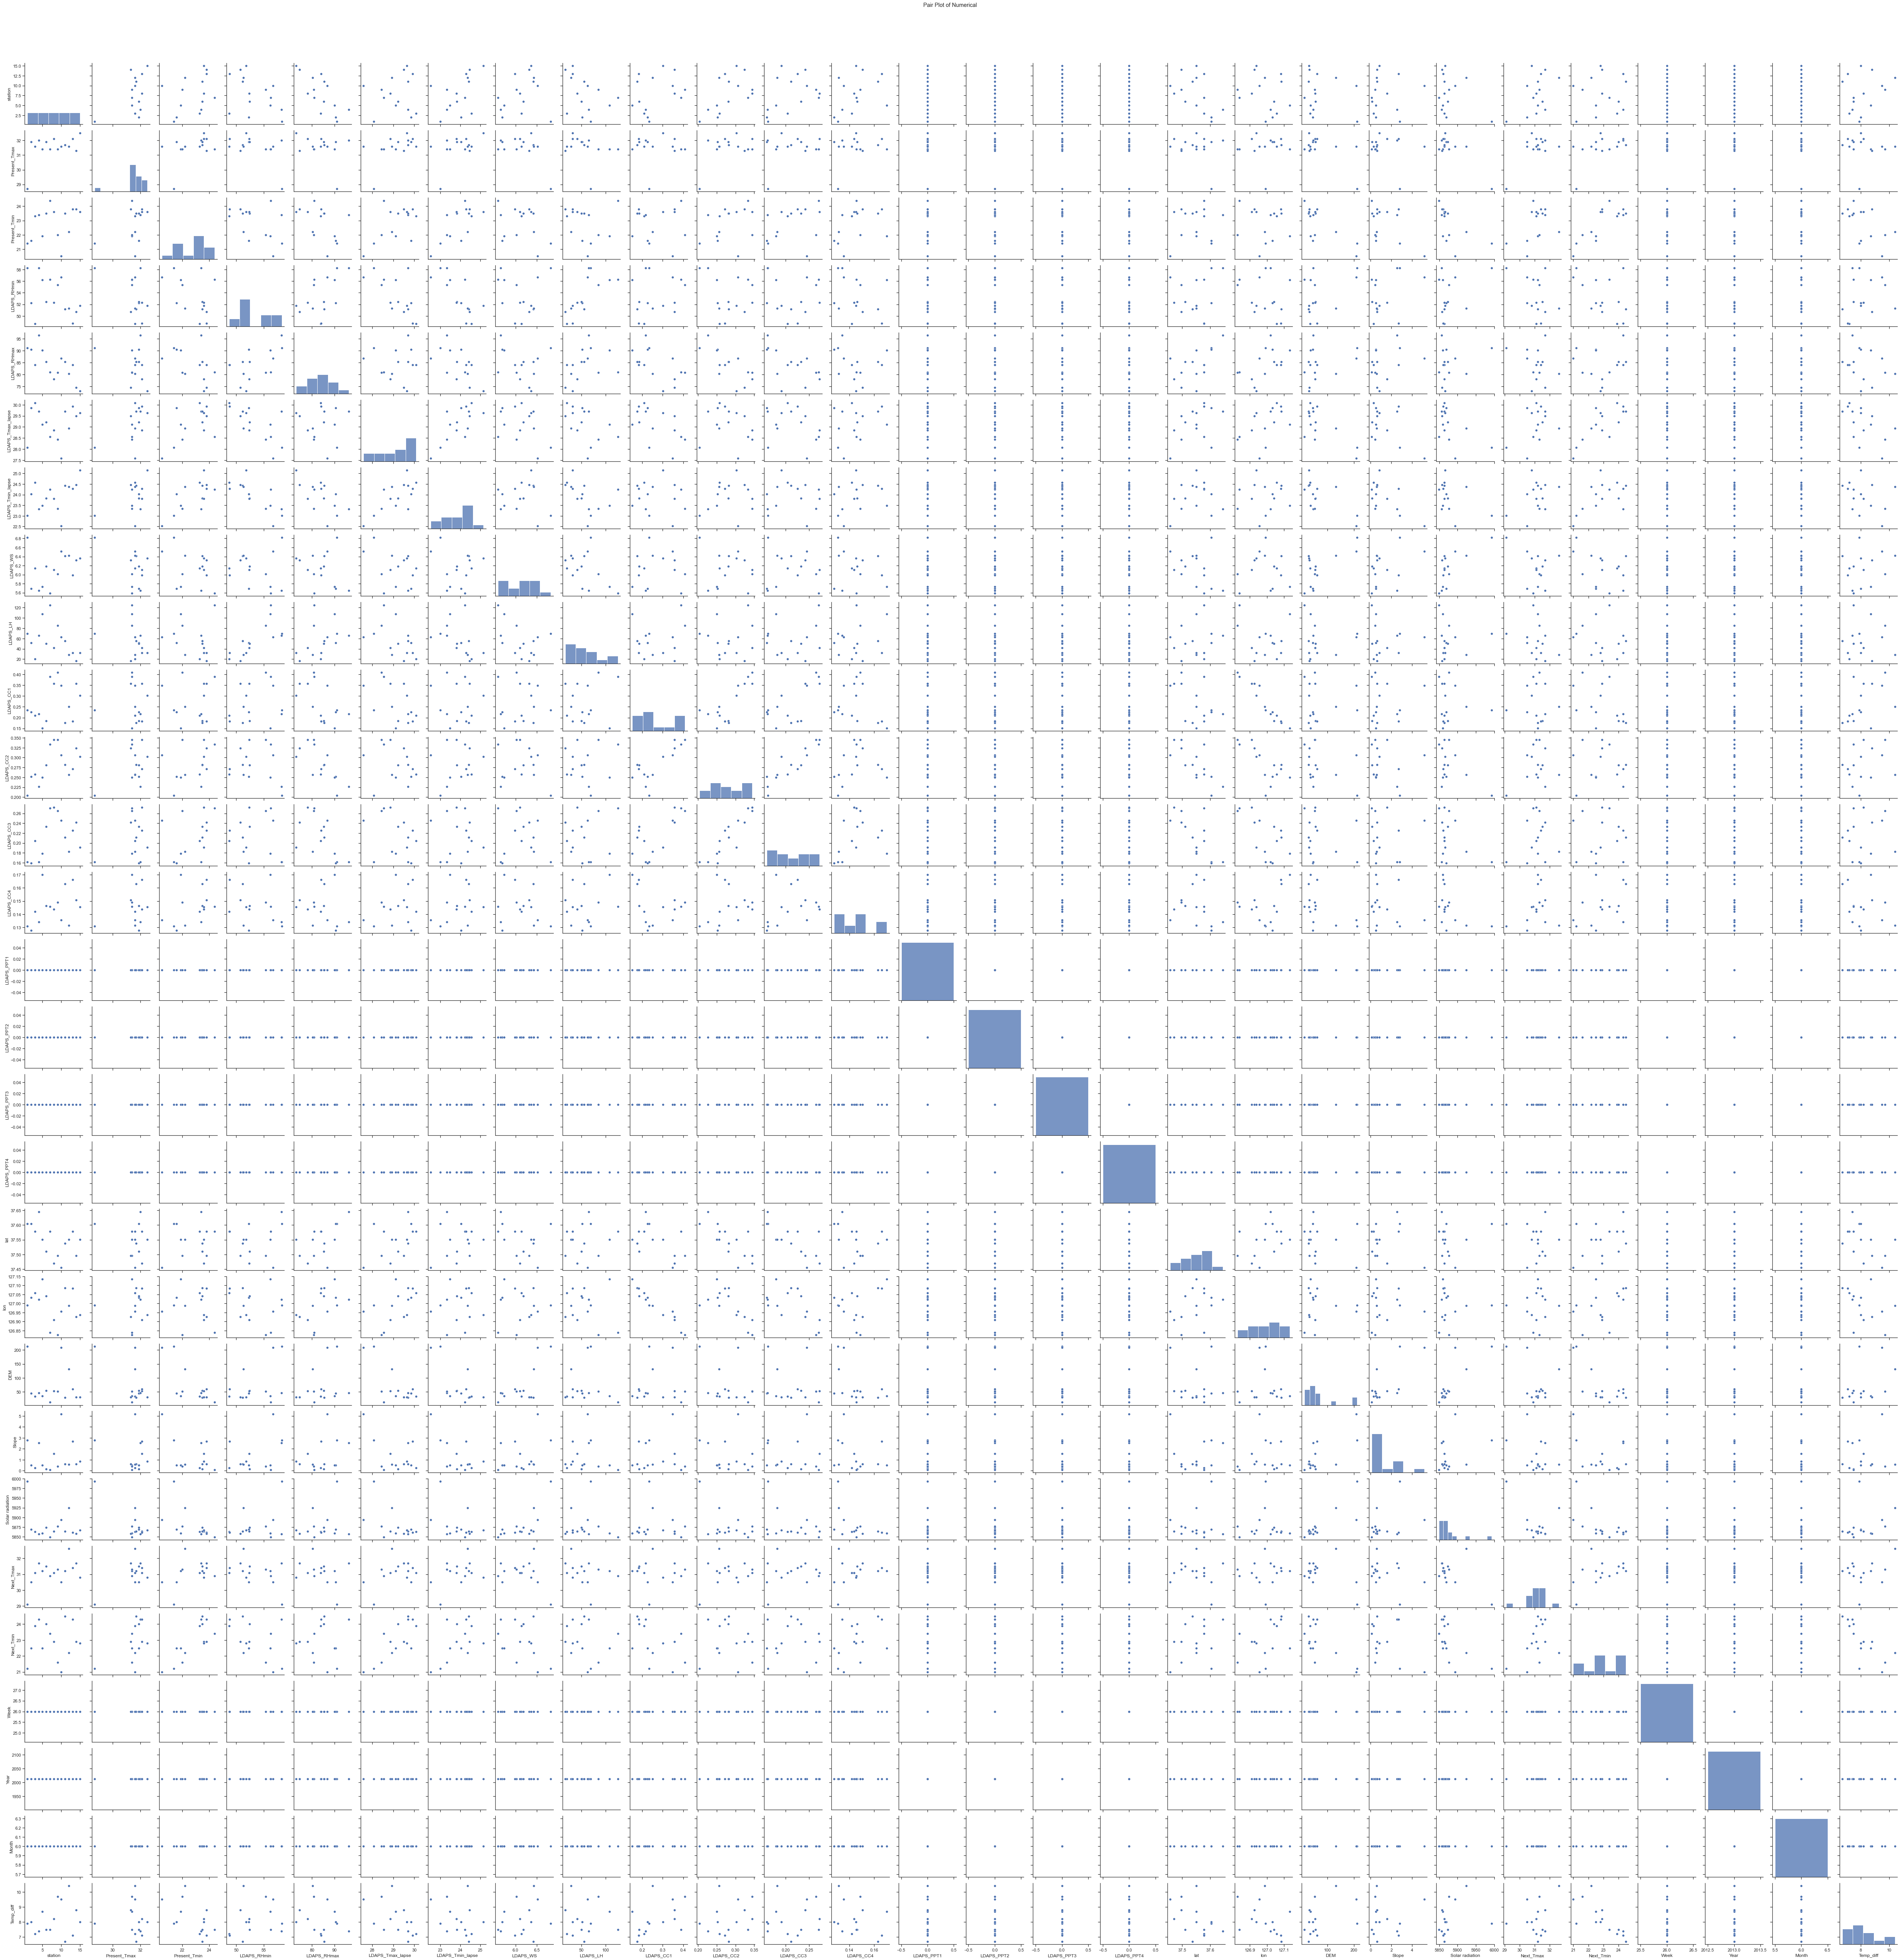

In [24]:
# Create a pair plot
sns.set(style="ticks")
sns.pairplot(dfint[])
plt.suptitle("Pair Plot of Numerical", y=1.02)
plt.show()

We can see trend in
- Next_Tmax vs LDAPS_Tmax_lapse
- Next_Tmax vs Present_Tmax
- Next_Tmax vs Present_Tmin
- Next_Tmax vs LDAPS_Tmin_lapse
- Next_Tmax vs Next_Tmin
- Next_Tmax vs Temp_diff
and many more

## Checking the outliers

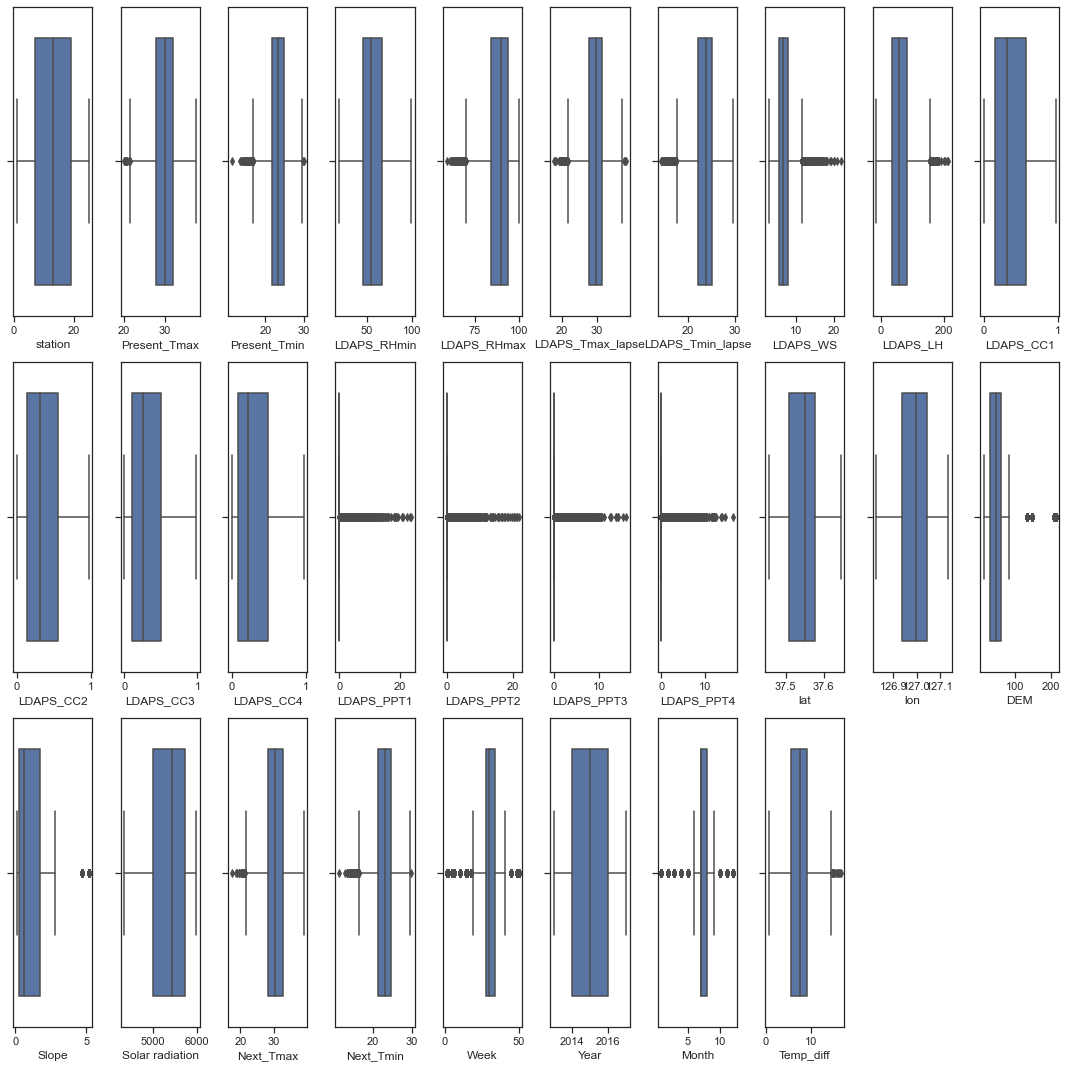

In [28]:
plt.figure(figsize=(15,15),facecolor="white")
plotnumber=1
for col in dfint:
    if plotnumber<=29:
        ax=plt.subplot(3,10,plotnumber)
        sns.boxplot(dfint[col])
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

From the above graphs we can see that we have outliers in most outliersf the columns

## Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

In [30]:
df4=lab_enc.fit_transform(df1['season'])
pd.Series(df4)
df1['season']=df4

## Checking skewnes

In [31]:
df1.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
Week               -0.954684
Year                0.013575
Month              -0.703092
season             -1.128080
Temp_diff          -0.024276
dtype: float64

## Correlation

In [32]:
df1.corr()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.113301      0.133282    -0.067846   
Present_Tmax      0.113301      1.000000      0.615208    -0.209059   
Present_Tmin      0.133282      0.615208      1.000000     0.122200   
LDAPS_RHmin      -0.067846     -0.209059      0.122200     1.000000   
LDAPS_RHmax      -0.169351     -0.306943     -0.018576     0.578358   
LDAPS_Tmax_lapse  0.069856      0.573777      0.467904    -0.569580   
LDAPS_Tmin_lapse  0.105277      0.628705      0.772061     0.085237   
LDAPS_WS          0.005822     -0.125952     -0.038779     0.289422   
LDAPS_LH         -0.132129      0.134246     -0.012817    -0.072195   
LDAPS_CC1         0.006539     -0.316333      0.084348     0.612831   
LDAPS_CC2         0.003526     -0.216976      0.090038     0.744774   
LDAPS_CC3        -0.000161     -0.146391     -0.004719     0.688069   
LDAPS_CC4         0.005005     -0.143069     -0.046694     0.513937   
LDAPS_PPT1       -0.001954     -0.114917      0.111577     0.259039   
LDAPS_PPT2       -0.007635     -0.104779      0.066207     0.389572   
LDAPS_PPT3       -0.013865     -0.127248     -0.052428     0.237512   
LDAPS_PPT4       -0.011085     -0.107295     -0.070391     0.167311   
lat              -0.239118     -0.054134     -0.081417     0.085027   
lon              -0.118845      0.007695     -0.045174    -0.077590   
DEM              -0.256706     -0.189439     -0.254084     0.100684   
Slope            -0.091721     -0.107079     -0.148423     0.122454   
Solar radiation  -0.021194     -0.022114      0.059765     0.242168   
Next_Tmax         0.107747      0.610357      0.463523    -0.446824   
Next_Tmin         0.128184      0.621048      0.796975     0.093249   
Week              0.001029     -0.022280     -0.029294    -0.063507   
Year              0.001474      0.056002      0.037457    -0.002147   
Month             0.001211     -0.003266     -0.010210    -0.053499   
season           -0.000171     -0.083212     -0.041122     0.079115   
Temp_diff         0.006804      0.142303     -0.213189    -0.645214   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.169351          0.069856          0.105277  0.005822   
Present_Tmax        -0.306943          0.573777          0.628705 -0.125952   
Present_Tmin        -0.018576          0.467904          0.772061 -0.038779   
LDAPS_RHmin          0.578358         -0.569580          0.085237  0.289422   
LDAPS_RHmax          1.000000         -0.377293         -0.118965  0.131269   
LDAPS_Tmax_lapse    -0.377293          1.000000          0.653425 -0.316011   
LDAPS_Tmin_lapse    -0.118965          0.653425          1.000000 -0.134652   
LDAPS_WS             0.131269         -0.316011         -0.134652  1.000000   
LDAPS_LH             0.238986          0.043663         -0.139675  0.004427   
LDAPS_CC1            0.435937         -0.440878          0.008714  0.285349   
LDAPS_CC2            0.390620         -0.525380          0.046537  0.257226   
LDAPS_CC3            0.224734         -0.542728         -0.044998  0.238155   
LDAPS_CC4            0.127242         -0.429739         -0.079536  0.218870   
LDAPS_PPT1           0.268019         -0.115659          0.034956  0.141503   
LDAPS_PPT2           0.227581         -0.248369         -0.002743  0.181634   
LDAPS_PPT3           0.132436         -0.193749         -0.093116  0.147199   
LDAPS_PPT4           0.118101         -0.170415         -0.103541  0.134428   
lat                  0.194820         -0.044052         -0.099452  0.033025   
lon                  0.025563          0.091568         -0.024703 -0.063009   
DEM                  0.176557         -0.181433         -0.198396  0.188540   
Slope                0.219436         -0.163891         -0.187864  0.169223   
Solar radiation      0.146622          0.047414          0.157763  0.120630   
Next_Tmax           -0.289788          0.835729          0.592119 -0.35

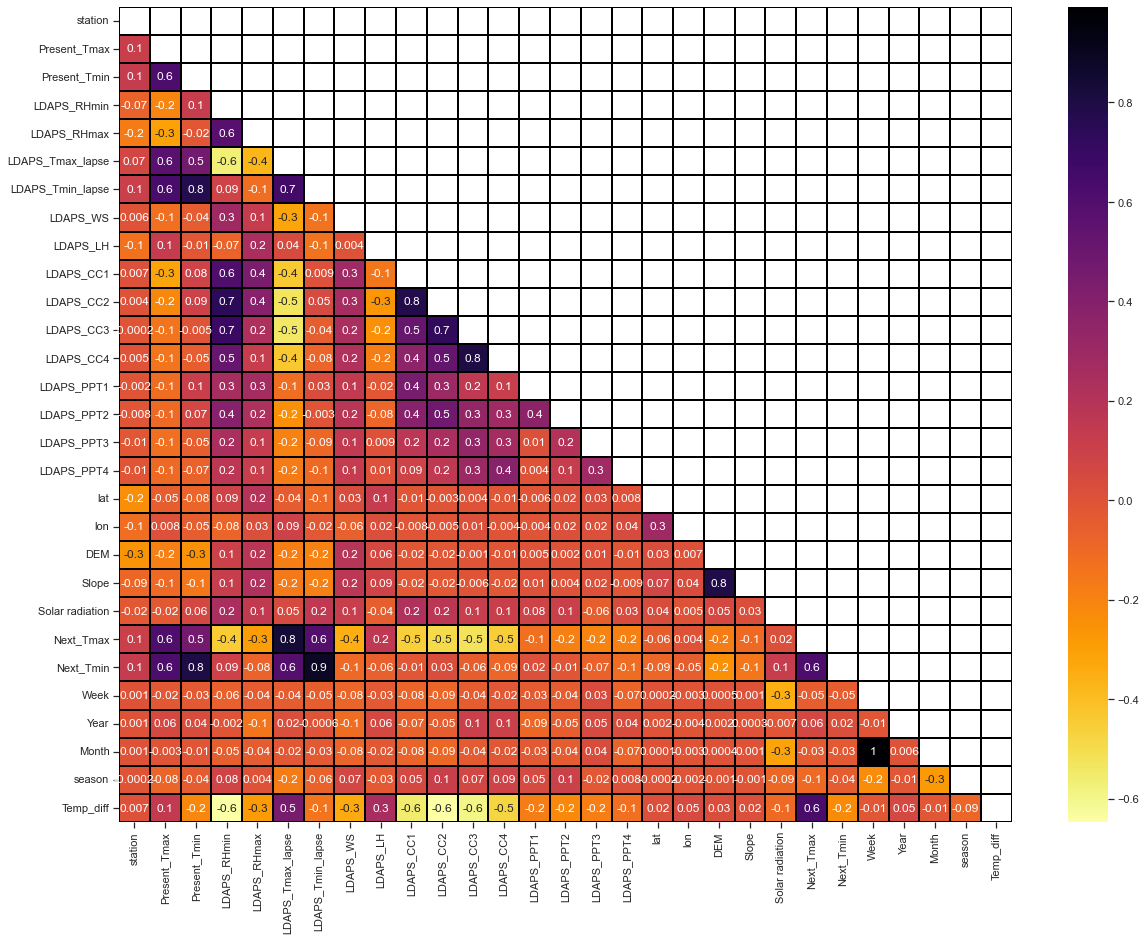

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Visualizing the correlation matrix by plotting heatmap
mask = np.triu(np.ones_like(df1.corr(), dtype=bool))
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(df1.corr(), mask=mask, cmap='inferno_r', annot=True, fmt=".1g", linewidths=0.1, ax=ax,linecolor="black")

plt.yticks(rotation=0);
plt.show()

From the above heatmap we can see that we have correlation between week and month, LDAPS_Tmax_;apse and next_Tmax and some other columns

# Splitting feature and labels

Creating 2 different label and feature split

In [36]:
# splitting the datset
x=df1.drop('Next_Tmax',axis=1)
y=df1.Next_Tmax
x1=df1.drop('Next_Tmin',axis=1)
y1=df1.Next_Tmin

In [40]:
x.head(5)

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmin  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       21.2   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       22.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       23.9   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       24.3   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       22.5   

   Week    Year  Month  season  Temp_diff  
0    26  2013.0    6.0       2        7.9  
1    26  2013.0    6.0       2        8.0  
2    26  2013.0    6.0       2        7.2  
3    26  2013.0    6.0       2        7.4  
4    26  2013.0    6.0       2        8.7

## Power transformation

In [42]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x1=power_transform(x1,method='yeo-johnson')

In [43]:
x= pd.DataFrame(x,columns=['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmin', 'Week', 'Year', 'Month', 'season',
       'Temp_diff'])

In [44]:
x1= pd.DataFrame(x1,columns=['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Week', 'Year', 'Month', 'season',
       'Temp_diff'])

In [45]:
# Reseting the index
x = x.reset_index(drop=True)
y = y.reset_index(drop=True)
x1 = x1.reset_index(drop=True)
y1 = y1.reset_index(drop=True)


In [46]:
# combining the dataframe
df2 = pd.concat([x, y], axis=1)
df3 = pd.concat([x1,y1],axis=1)

In [47]:
df2.skew()

station            -0.206291
Present_Tmax       -0.036516
Present_Tmin       -0.014363
LDAPS_RHmin        -0.018008
LDAPS_RHmax        -0.120174
LDAPS_Tmax_lapse   -0.012155
LDAPS_Tmin_lapse   -0.021647
LDAPS_WS            0.005937
LDAPS_LH            0.028141
LDAPS_CC1           0.048221
LDAPS_CC2           0.047595
LDAPS_CC3           0.091156
LDAPS_CC4           0.129974
LDAPS_PPT1          1.451770
LDAPS_PPT2          1.637689
LDAPS_PPT3          1.814526
LDAPS_PPT4          2.041426
lat                 0.000000
lon                -0.202301
DEM                 0.039591
Slope               0.233968
Solar radiation    -0.182349
Next_Tmin          -0.016081
Week               -0.166695
Year                0.000000
Month               0.043710
season             -0.044127
Temp_diff          -0.052611
Next_Tmax          -0.334842
dtype: float64

In [48]:
df3.skew()

station            -0.206291
Present_Tmax       -0.036516
Present_Tmin       -0.014363
LDAPS_RHmin        -0.018008
LDAPS_RHmax        -0.120174
LDAPS_Tmax_lapse   -0.012155
LDAPS_Tmin_lapse   -0.021647
LDAPS_WS            0.005937
LDAPS_LH            0.028141
LDAPS_CC1           0.048221
LDAPS_CC2           0.047595
LDAPS_CC3           0.091156
LDAPS_CC4           0.129974
LDAPS_PPT1          1.451770
LDAPS_PPT2          1.637689
LDAPS_PPT3          1.814526
LDAPS_PPT4          2.041426
lat                 0.000000
lon                -0.202301
DEM                 0.039591
Slope               0.233968
Solar radiation    -0.182349
Next_Tmax          -0.039960
Week               -0.166695
Year                0.000000
Month               0.043710
season             -0.044127
Temp_diff          -0.052611
Next_Tmin          -0.393662
dtype: float64

## Treating outliers

### Z-Score

In [49]:
from scipy.stats import zscore
import numpy as np


In [50]:
z=np.abs(zscore(x))
z.shape

(7588, 28)

In [51]:
Threshold = 3
outlier_indices = np.where(z > 3)[0]

In [52]:
df3 = x.loc[~np.isin(np.arange(len(x)), outlier_indices)]
print(x.shape)
print(df3.shape)

(7588, 28)
(7524, 28)


In [53]:
y = y.loc[~np.isin(np.arange(len(y)), outlier_indices)]
print(y.shape)


(7524,)


In [54]:
(x.shape[0]-df3.shape[0])/x.shape[0]

0.008434370057986295

Percentage data loss is 0.8%

In [55]:
x=df3

In [56]:
z1=np.abs(zscore(x1))
z1.shape

(7588, 28)

In [57]:
Threshold = 3
outlier_indices = np.where(z1 > 3)[0]

In [58]:
df4 = x1.loc[~np.isin(np.arange(len(x1)), outlier_indices)]
print(x1.shape)
print(df4.shape)

(7588, 28)
(7526, 28)


In [59]:
y1 = y1.loc[~np.isin(np.arange(len(y1)), outlier_indices)]
print(y1.shape)


(7526,)


In [60]:
(x1.shape[0]-df4.shape[0])/x1.shape[0]

0.008170795993674223

Percentage data loss is 0.8%

In [61]:
x1=df4

## VIF

In [62]:
# Finding VIF in each scaled column i.e x.shape[1]/(1/(1-r2))
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['Features']=x.columns

vif

VIF values          Features
0     1.316414           station
1     3.011916      Present_Tmax
2     3.448772      Present_Tmin
3     6.323308       LDAPS_RHmin
4     2.623541       LDAPS_RHmax
5     8.883051  LDAPS_Tmax_lapse
6     8.911146  LDAPS_Tmin_lapse
7     1.327064          LDAPS_WS
8     1.555807          LDAPS_LH
9     4.732487         LDAPS_CC1
10    5.665122         LDAPS_CC2
11    5.074575         LDAPS_CC3
12    3.136556         LDAPS_CC4
13    2.335584        LDAPS_PPT1
14    2.138054        LDAPS_PPT2
15    1.782053        LDAPS_PPT3
16    1.858303        LDAPS_PPT4
17    1.315402               lat
18    1.228483               lon
19    3.392186               DEM
20    2.924495             Slope
21    1.551420   Solar radiation
22    6.723051         Next_Tmin
23   89.359002              Week
24    1.133989              Year
25   87.571963             Month
26    1.210282            season
27    3.141391         Temp_diff

In [63]:
x.drop('Week',axis=1,inplace=True)

week have high VIF value so we are dropping it

In [64]:
# Finding VIF in each scaled column i.e x.shape[1]/(1/(1-r2))
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['Features']=x.columns

vif

VIF values          Features
0     1.316401           station
1     3.004806      Present_Tmax
2     3.441611      Present_Tmin
3     6.250668       LDAPS_RHmin
4     2.622247       LDAPS_RHmax
5     8.742066  LDAPS_Tmax_lapse
6     8.911054  LDAPS_Tmin_lapse
7     1.326999          LDAPS_WS
8     1.555156          LDAPS_LH
9     4.724027         LDAPS_CC1
10    5.641761         LDAPS_CC2
11    5.070311         LDAPS_CC3
12    3.129446         LDAPS_CC4
13    2.334156        LDAPS_PPT1
14    2.134247        LDAPS_PPT2
15    1.775884        LDAPS_PPT3
16    1.849688        LDAPS_PPT4
17    1.315088               lat
18    1.228279               lon
19    3.392181               DEM
20    2.924310             Slope
21    1.331345   Solar radiation
22    6.701841         Next_Tmin
23    1.113348              Year
24    1.199071             Month
25    1.143519            season
26    3.139275         Temp_diff

LDAPS_Tmin_lapse have highest VIF

In [65]:
x.drop('LDAPS_Tmin_lapse',axis=1,inplace=True)

In [67]:
# Finding VIF in each scaled column i.e x.shape[1]/(1/(1-r2))
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['Features']=x.columns


vif

VIF values          Features
0     1.316323           station
1     2.825370      Present_Tmax
2     3.371884      Present_Tmin
3     4.994199       LDAPS_RHmin
4     2.558181       LDAPS_RHmax
5     5.795026  LDAPS_Tmax_lapse
6     1.326953          LDAPS_WS
7     1.484079          LDAPS_LH
8     4.619185         LDAPS_CC1
9     5.634859         LDAPS_CC2
10    5.069311         LDAPS_CC3
11    3.122351         LDAPS_CC4
12    2.310611        LDAPS_PPT1
13    2.132768        LDAPS_PPT2
14    1.771152        LDAPS_PPT3
15    1.845501        LDAPS_PPT4
16    1.312924               lat
17    1.222727               lon
18    3.340806               DEM
19    2.869591             Slope
20    1.319845   Solar radiation
21    5.813591         Next_Tmin
22    1.111089              Year
23    1.197237             Month
24    1.133840            season
25    3.103560         Temp_diff

In [68]:
# Finding VIF in each scaled column i.e x.shape[1]/(1/(1-r2))
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x1.values,i)for i in range(len(x1.columns))]
vif['Features']=x1.columns


vif

VIF values          Features
0     1.316939           station
1     3.016828      Present_Tmax
2     3.441218      Present_Tmin
3     6.376255       LDAPS_RHmin
4     2.623214       LDAPS_RHmax
5     9.086632  LDAPS_Tmax_lapse
6     8.727226  LDAPS_Tmin_lapse
7     1.325665          LDAPS_WS
8     1.554295          LDAPS_LH
9     4.731783         LDAPS_CC1
10    5.664317         LDAPS_CC2
11    5.070880         LDAPS_CC3
12    3.132138         LDAPS_CC4
13    2.332676        LDAPS_PPT1
14    2.124232        LDAPS_PPT2
15    1.779046        LDAPS_PPT3
16    1.852421        LDAPS_PPT4
17    1.315722               lat
18    1.229195               lon
19    3.387040               DEM
20    2.926030             Slope
21    1.553438   Solar radiation
22   10.586121         Next_Tmax
23   89.303155              Week
24    1.133110              Year
25   87.479843             Month
26    1.209099            season
27    6.675373         Temp_diff

Week have high VIF value so we are dropping it

In [69]:
x1.drop('Week',axis=1,inplace=True)

In [70]:
# Finding VIF in each scaled column i.e x.shape[1]/(1/(1-r2))
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x1.values,i)for i in range(len(x1.columns))]
vif['Features']=x1.columns

vif

VIF values          Features
0     1.316918           station
1     3.010414      Present_Tmax
2     3.435293      Present_Tmin
3     6.304782       LDAPS_RHmin
4     2.621760       LDAPS_RHmax
5     8.949684  LDAPS_Tmax_lapse
6     8.726339  LDAPS_Tmin_lapse
7     1.325587          LDAPS_WS
8     1.553718          LDAPS_LH
9     4.722931         LDAPS_CC1
10    5.639574         LDAPS_CC2
11    5.066421         LDAPS_CC3
12    3.124739         LDAPS_CC4
13    2.331444        LDAPS_PPT1
14    2.120943        LDAPS_PPT2
15    1.772639        LDAPS_PPT3
16    1.844197        LDAPS_PPT4
17    1.315450               lat
18    1.228980               lon
19    3.386978               DEM
20    2.925918             Slope
21    1.332160   Solar radiation
22   10.567694         Next_Tmax
23    1.112775              Year
24    1.198980             Month
25    1.141887            season
26    6.670461         Temp_diff

LDAPS_Tmin_lapse have highest VIF

In [71]:
x1.drop('LDAPS_Tmax_lapse',axis=1,inplace=True)

In [72]:
# Finding VIF in each scaled column i.e x.shape[1]/(1/(1-r2))
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x1.values,i)for i in range(len(x1.columns))]
vif['Features']=x1.columns


vif

VIF values          Features
0     1.311826           station
1     2.943410      Present_Tmax
2     3.434120      Present_Tmin
3     4.267639       LDAPS_RHmin
4     2.606205       LDAPS_RHmax
5     5.865455  LDAPS_Tmin_lapse
6     1.318121          LDAPS_WS
7     1.553500          LDAPS_LH
8     4.691052         LDAPS_CC1
9     5.586751         LDAPS_CC2
10    5.046341         LDAPS_CC3
11    3.102575         LDAPS_CC4
12    2.301521        LDAPS_PPT1
13    2.120474        LDAPS_PPT2
14    1.766194        LDAPS_PPT3
15    1.830856        LDAPS_PPT4
16    1.308962               lat
17    1.202711               lon
18    3.386963               DEM
19    2.921563             Slope
20    1.282050   Solar radiation
21    9.580266         Next_Tmax
22    1.112562              Year
23    1.193368             Month
24    1.101300            season
25    6.666376         Temp_diff

## Feature selection

In [73]:
from sklearn.feature_selection import SelectKBest,f_classif

In [74]:
best_features = SelectKBest(score_func=f_classif,k=10) # run multiple time and find the best

fit=best_features.fit(x,y)

df_scores=pd.DataFrame(fit.scores_)

df_columns=pd.DataFrame(x.columns)

# concatenate dataframe
feature_scores=pd.concat([df_columns,df_scores],axis=1)

feature_scores.columns=['Feature_Name','Score'] # name output columns
print(feature_scores.nlargest(26,'Score')) # print 25 best features

        Feature_Name      Score
5   LDAPS_Tmax_lapse  98.825884
25         Temp_diff  32.794426
21         Next_Tmin  29.735587
1       Present_Tmax  28.569039
10         LDAPS_CC3  15.445747
9          LDAPS_CC2  15.371807
2       Present_Tmin  14.104173
11         LDAPS_CC4  12.523860
8          LDAPS_CC1  12.346697
3        LDAPS_RHmin  11.314043
13        LDAPS_PPT2   9.831012
14        LDAPS_PPT3   8.946769
15        LDAPS_PPT4   8.043285
12        LDAPS_PPT1   6.445201
4        LDAPS_RHmax   5.999741
6           LDAPS_WS   5.254277
22              Year   2.268868
24            season   2.090390
7           LDAPS_LH   2.053881
18               DEM   1.933025
20   Solar radiation   1.630160
0            station   1.588697
19             Slope   1.511681
23             Month   1.505082
16               lat   0.971508
17               lon   0.902592


In [75]:
x.drop(['Year','season','LDAPS_LH','DEM','Solar radiation','station','Slope','Month','lat','lon'],axis=1,inplace=True)

In [76]:
x.shape

(7524, 16)

In [77]:
best_features = SelectKBest(score_func=f_classif,k=25) # run multiple time and find the best

fit=best_features.fit(x1,y1)

df_scores=pd.DataFrame(fit.scores_)

df_columns=pd.DataFrame(x1.columns)

# concatenate dataframe
feature_scores=pd.concat([df_columns,df_scores],axis=1)

feature_scores.columns=['Feature_Name','Score'] # name output columns
print(feature_scores.nlargest(26,'Score')) # print 25 best features

        Feature_Name       Score
5   LDAPS_Tmin_lapse  174.191863
2       Present_Tmin   85.148627
1       Present_Tmax   33.398110
21         Next_Tmax   32.699155
20   Solar radiation    4.487139
25         Temp_diff    4.335026
18               DEM    4.059284
3        LDAPS_RHmin    3.085947
15        LDAPS_PPT4    2.900293
4        LDAPS_RHmax    2.672435
19             Slope    2.198349
11         LDAPS_CC4    2.146191
10         LDAPS_CC3    2.109746
0            station    2.075123
22              Year    1.999606
9          LDAPS_CC2    1.959984
23             Month    1.620747
8          LDAPS_CC1    1.618484
13        LDAPS_PPT2    1.592976
12        LDAPS_PPT1    1.537528
14        LDAPS_PPT3    1.535450
24            season    1.456873
7           LDAPS_LH    1.367898
16               lat    1.353489
6           LDAPS_WS    1.342522
17               lon    0.927108


In [79]:
x1.drop(['Slope','LDAPS_CC4','LDAPS_CC3','station','Year','LDAPS_CC2','Month','LDAPS_CC1','LDAPS_PPT2','LDAPS_PPT1','LDAPS_PPT1','season','LDAPS_LH','lat','LDAPS_WS','lon'], axis=1,inplace=True)

In [80]:
x1.shape

(7526, 11)

# Building model for Next_Tmax

In [81]:
# importing necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

## best random state

In [83]:
random_states = range(1, 200)
r2_scores = []

for rs in random_states:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=rs)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    r2 = r2_score(y_test, pred)
    r2_scores.append(r2)

max_r2 = max(r2_scores)
max_rs = random_states[r2_scores.index(max_r2)]

print("Best accuracy is", max_r2, "at random_state", max_rs)


Best accuracy is 0.9963839190881958 at random_state 153


## Train test split

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=max_rs)

In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor 

In [86]:
training_r2_score = []
testing_r2_score = []

In [87]:
def model_prediction(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_train)
    pred = model.predict(x_test)
    a = r2_score(y_train,y_pred)*100
    b = r2_score(y_test,pred)*100
    training_r2_score.append(a)
    testing_r2_score.append(b)
    print(f"R2_Score of {model} model on Training Data is:",a)
    print(f"R2_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Mean Absolute Error of {model} model is:",mean_absolute_error(y_test,pred))
    print(f"Mean Square Error of {model} model is:", mean_squared_error(y_test,pred))
    print(f"Squarroot Mean Square Error  {model} model is:",np.sqrt(mean_squared_error(y_test,pred)))
    print("\n------------------------------------------------------------------------")

In [88]:
model_prediction(LinearRegression())

R2_Score of LinearRegression() model on Training Data is: 99.55526580377366
R2_Score of LinearRegression() model on Testing Data is: 99.63839190881959

------------------------------------------------------------------------
Mean Absolute Error of LinearRegression() model is: 0.1361606981778614
Mean Square Error of LinearRegression() model is: 0.03437487892675712
Squarroot Mean Square Error  LinearRegression() model is: 0.18540463566684928

------------------------------------------------------------------------


In [89]:
lasscv=LassoCV(alphas=None,max_iter=10)
lasscv.fit(x_train,y_train)
alpha=lasscv.alpha_
model_prediction(Lasso(alpha))

R2_Score of Lasso(alpha=0.0025371814038401552) model on Training Data is: 99.55331764100205
R2_Score of Lasso(alpha=0.0025371814038401552) model on Testing Data is: 99.63695667915606

------------------------------------------------------------------------
Mean Absolute Error of Lasso(alpha=0.0025371814038401552) model is: 0.13693466686803502
Mean Square Error of Lasso(alpha=0.0025371814038401552) model is: 0.03451131350086901
Squarroot Mean Square Error  Lasso(alpha=0.0025371814038401552) model is: 0.1857722086343084

------------------------------------------------------------------------


In [90]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01))
ridgecv.fit(x_train,y_train)
model_prediction(Ridge(alpha=ridgecv.alpha_))

R2_Score of Ridge(alpha=0.020999999999999998) model on Training Data is: 99.55526579268373
R2_Score of Ridge(alpha=0.020999999999999998) model on Testing Data is: 99.63839380697293

------------------------------------------------------------------------
Mean Absolute Error of Ridge(alpha=0.020999999999999998) model is: 0.13616082818796835
Mean Square Error of Ridge(alpha=0.020999999999999998) model is: 0.034374698486128785
Squarroot Mean Square Error  Ridge(alpha=0.020999999999999998) model is: 0.18540414905316652

------------------------------------------------------------------------


In [91]:
model_prediction(SVR())

R2_Score of SVR() model on Training Data is: 99.7449777861448
R2_Score of SVR() model on Testing Data is: 99.67168563916479

------------------------------------------------------------------------
Mean Absolute Error of SVR() model is: 0.10881726519590797
Mean Square Error of SVR() model is: 0.031209938822953406
Squarroot Mean Square Error  SVR() model is: 0.17666334883883925

------------------------------------------------------------------------


In [92]:
model_prediction(RandomForestRegressor())

R2_Score of RandomForestRegressor() model on Training Data is: 99.88816212181032
R2_Score of RandomForestRegressor() model on Testing Data is: 99.42108339662794

------------------------------------------------------------------------
Mean Absolute Error of RandomForestRegressor() model is: 0.13761647475642177
Mean Square Error of RandomForestRegressor() model is: 0.05503247475642144
Squarroot Mean Square Error  RandomForestRegressor() model is: 0.2345900141873508

------------------------------------------------------------------------


In [93]:
model_prediction(GradientBoostingRegressor())

R2_Score of GradientBoostingRegressor() model on Training Data is: 99.03306568304991
R2_Score of GradientBoostingRegressor() model on Testing Data is: 98.70832316391053

------------------------------------------------------------------------
Mean Absolute Error of GradientBoostingRegressor() model is: 0.27249134877646625
Mean Square Error of GradientBoostingRegressor() model is: 0.12278827807234757
Squarroot Mean Square Error  GradientBoostingRegressor() model is: 0.35041158381587156

------------------------------------------------------------------------


In [94]:
model_prediction(DecisionTreeRegressor())

R2_Score of DecisionTreeRegressor() model on Training Data is: 100.0
R2_Score of DecisionTreeRegressor() model on Testing Data is: 98.00426804477243

------------------------------------------------------------------------
Mean Absolute Error of DecisionTreeRegressor() model is: 0.28573959255978737
Mean Square Error of DecisionTreeRegressor() model is: 0.18971656333038078
Squarroot Mean Square Error  DecisionTreeRegressor() model is: 0.4355646488529352

------------------------------------------------------------------------


In [95]:
model_prediction(AdaBoostRegressor())

R2_Score of AdaBoostRegressor() model on Training Data is: 93.31977932858011
R2_Score of AdaBoostRegressor() model on Testing Data is: 93.40766596335189

------------------------------------------------------------------------
Mean Absolute Error of AdaBoostRegressor() model is: 0.6368209970968911
Mean Square Error of AdaBoostRegressor() model is: 0.6266748169676766
Squarroot Mean Square Error  AdaBoostRegressor() model is: 0.7916279536295295

------------------------------------------------------------------------


In [96]:
model_prediction(XGBRegressor ())

R2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) model on Training Data is: 99.90140625104293
R2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
      

In [97]:
models=['LinearRegression','Lasso','Ridge','SVR','RandomForestRegressor','GradientBoostingRegressor','DecisionTreeRegressor','AdaBoostRegressor','XGBRegressor']

In [98]:
df4 = pd.DataFrame({"Algorithms":models,
                   "Training R2 Score":training_r2_score,
                   "Testing R2 Score":testing_r2_score
                  })
df4

Algorithms  Training R2 Score  Testing R2 Score
0           LinearRegression          99.555266         99.638392
1                      Lasso          99.553318         99.636957
2                      Ridge          99.555266         99.638394
3                        SVR          99.744978         99.671686
4      RandomForestRegressor          99.888162         99.421083
5  GradientBoostingRegressor          99.033066         98.708323
6      DecisionTreeRegressor         100.000000         98.004268
7          AdaBoostRegressor          93.319779         93.407666
8               XGBRegressor          99.901406         99.238138

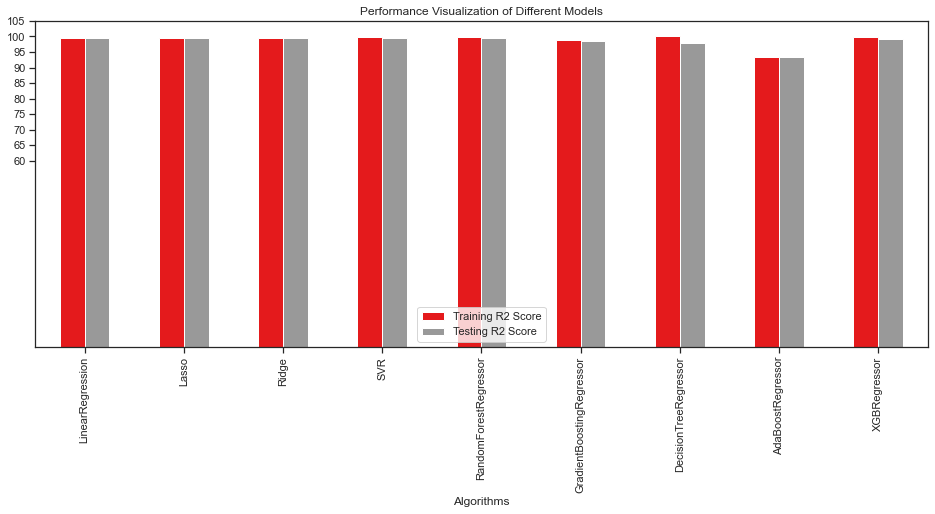

In [99]:
df4.plot(x="Algorithms",y=["Training R2 Score","Testing R2 Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set1")
plt.yticks(range(60,106,5))
plt.show()

In [100]:
from sklearn.model_selection import cross_val_score

In [101]:
num_folds_range = range(2,20)

model = LinearRegression()

fold_performance = {}

for num_folds in num_folds_range:
    scores = cross_val_score(model, x, y, cv=num_folds, scoring='neg_mean_squared_error')  # or 'r2' for coefficient of determination
    fold_performance[num_folds] = {
        'mean': np.mean(scores),
        'std': np.std(scores)
    }
    
df_fold_performance = pd.DataFrame(fold_performance).transpose()

print(df_fold_performance)

        mean       std
2  -0.050946  0.011826
3  -0.053073  0.021910
4  -0.048862  0.022571
5  -0.047111  0.016699
6  -0.048856  0.021451
7  -0.046309  0.023321
8  -0.046803  0.021326
9  -0.050360  0.026149
10 -0.047071  0.029705
11 -0.046553  0.031065
12 -0.047736  0.029381
13 -0.048195  0.030398
14 -0.048515  0.032296
15 -0.046129  0.034064
16 -0.046770  0.037330
17 -0.047295  0.037612
18 -0.047789  0.038799
19 -0.047072  0.036895


In [102]:
# checking cv score for logistic Regression
score = cross_val_score(LinearRegression(),x,y,cv=5)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[0]/100)- score.mean())

[0.99646552 0.99501096 0.99484106 0.99481134 0.99375085]
0.9949759458058208
Differnet between Accuracy score and cross validation score is-  0.0014079732823750746


In [103]:
# checking cv score for logistic Regression
score = cross_val_score(Lasso(),x,y,cv=5)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[1]/100)- score.mean())

[0.68197542 0.65074536 0.70022858 0.54626665 0.67611467]
0.6510661357501851
Differnet between Accuracy score and cross validation score is-  0.3453034310413754


In [104]:
# checking cv score for logistic Regression
score = cross_val_score(Ridge(),x,y,cv=5)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[2]/100)- score.mean())

[0.99647504 0.99498837 0.99483303 0.99483672 0.99375562]
0.9949777561108567
Differnet between Accuracy score and cross validation score is-  0.0014061819588725433


In [105]:
# checking cv score for logistic Regression
score = cross_val_score(SVR(),x,y,cv=5)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[3]/100)- score.mean())

[0.98620093 0.9546966  0.98723829 0.98480847 0.97670557]
0.9779299731131734
Differnet between Accuracy score and cross validation score is-  0.018786883278474553


In [106]:
# checking cv score for logistic Regression
score = cross_val_score(RandomForestRegressor(),x,y,cv=5)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[4]/100)- score.mean())

[0.99057011 0.97796061 0.98636366 0.98231201 0.97748022]
0.9829373231209366
Differnet between Accuracy score and cross validation score is-  0.011273510845342782


In [107]:
# checking cv score for logistic Regression
score = cross_val_score(GradientBoostingRegressor(),x,y, cv=5)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[5]/100)- score.mean())

[0.98068263 0.97593822 0.97782783 0.98638403 0.98173386]
0.980513314776559
Differnet between Accuracy score and cross validation score is-  0.006569916862546377


In [108]:
# checking cv score for logistic Regression
score = cross_val_score(DecisionTreeRegressor(),x,y, cv=5)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[6]/100)- score.mean())

[0.97887032 0.96104393 0.9581491  0.95445242 0.95398299]
0.9612997517918382
Differnet between Accuracy score and cross validation score is-  0.018742928655886115


In [109]:
# checking cv score for logistic Regression
score = cross_val_score(AdaBoostRegressor(),x,y,cv=5)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[7]/100)- score.mean())

[0.90334338 0.8920209  0.90845556 0.92000854 0.92110905]
0.9089874871739841
Differnet between Accuracy score and cross validation score is-  0.025089172459534792


In [110]:
# checking cv score for logistic Regression
score = cross_val_score(XGBRegressor(),x,y,cv=5)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[8]/100)- score.mean())

[0.98679634 0.98848238 0.98932988 0.99151108 0.99193558]
0.9896110535022664
Differnet between Accuracy score and cross validation score is-  0.002770327032601827


XGBRegressor,GradientBoostingRegressor and Linear regression are the model with highest accuracy and least diffrenece

## Gridsearch CV

In [114]:
from sklearn.model_selection import GridSearchCV

### LinearRegression

In [127]:
model1 = Ridge()

In [128]:
parameters1 ={'positive':[True,False],
             'solver':['auto', 'svd','cholesky','lsqr','sparse_cg', 'sag', 'saga', 'lbfgs'],
             'alpha':[0.02,0.04,0.2,0.3]
             }

In [129]:
grid_search = GridSearchCV(model1, param_grid=parameters1, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.02, 0.04, 0.2, 0.3],
                         'positive': [True, False],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga', 'lbfgs']})

In [130]:
grid_search.best_estimator_
best=grid_search.best_params_
best

{'alpha': 0.02, 'positive': False, 'solver': 'lsqr'}

In [131]:
model1=Ridge(alpha= 0.02, positive= False, solver= 'lsqr')

In [132]:
model1.fit(x_train,y_train)

x_test_pred1 = model1.predict(x_test)

r2_score(y_test,x_test_pred1)

0.9963838828455386

### XGBRegressor

In [111]:
model2=XGBRegressor()

In [112]:
parameters2 ={'booster':['gbtree', 'gblinear', 'dart'],
             'learning_rate':[0.05,.01,.02],
             'disable_default_eval_metric':[True,False]
             }

In [115]:
grid_search = GridSearchCV(model2, param_grid=parameters2, cv=3)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'booster': ['gbtree', 'gblinear', 'dart'],
                         'disable_default_eval_metric': [True, False],
                         'learning_rate': [0.005, 0.01, 0.02]})

In [116]:
grid_search.best_estimator_
best=grid_search.best_params_
best

{'booster': 'dart', 'disable_default_eval_metric': True, 'learning_rate': 0.02}

In [119]:
model2=XGBRegressor(booster= 'dart', disable_default_eval_metric= True, learning_rate= 0.05)

In [120]:
model2.fit(x_train,y_train)

x_test_pred2 = model2.predictmodel2=XGBRegressor(booster= 'dart', disable_default_eval_metric= True, learning_rate= 0.05)(x_test)

r2_score(y_test,x_test_pred2)

0.989183895579755

### GradientBoostingRegressor

In [121]:
model3=GradientBoostingRegressor()

In [122]:
param_grid={'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
           'criterion':['friedman_mse', 'squared_error'],
           'learning_rate':[.005,.01,.02,.04],
           'n_estimators':[50,100,150]}

In [123]:
grid_search = GridSearchCV(model3, param_grid=param_grid, cv=3)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.005, 0.01, 0.02, 0.04],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'n_estimators': [50, 100, 150]})

In [124]:
grid_search.best_estimator_
best=grid_search.best_params_
best

{'criterion': 'squared_error',
 'learning_rate': 0.04,
 'loss': 'squared_error',
 'n_estimators': 150}

In [125]:
model3=GradientBoostingRegressor(criterion= 'squared_error', learning_rate= 0.04 , loss= 'squared_error', n_estimators= 150)

In [126]:
model3.fit(x_train,y_train)

x_test_pred3 = model3.predict(x_test)

r2_score(y_test,x_test_pred3)

0.9751760850260403

## Saving the model

In [133]:
import pickle
filename='Max_temp.pkl'
pickle.dump(model1,open(filename,'wb'))#saved model

## Loading model

In [134]:
loaded_model=pickle.load(open('Max_temp.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

99.63838828455386


In [136]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])
conclusion

0          1          2          3          4          5     \
Predicted  25.228791  31.630958  30.736589  32.829044  31.221154  26.541393   
Original   25.000000  31.500000  30.700000  32.800000  30.900000  26.600000   

                6          7          8          9          10         11    \
Predicted  25.425365  35.803828  34.647055  32.518539  25.051378  26.712251   
Original   25.500000  35.600000  34.600000  32.600000  25.200000  26.800000   

                12         13         14         15         16         17    \
Predicted  27.293572  33.323816  27.660957  27.064007  32.671904  25.098134   
Original   27.300000  33.400000  27.800000  27.100000  32.200000  25.300000   

                18        19        20         21        22         23    \
Predicted  28.565474  29.90184  29.19718  31.487155  27.66473  31.476668   
Original   28.700000  30.10000  29.20000  31.700000  27.60000  31.600000   

                24         25         26         27         28         29    \
Predicted  24.462968  26.629355  31.230078  29.849397  29.902506  27.982024   
Original   23.900000  26.700000  31.300000  30.000000  30.000000  27.900000   

                30         31         32         33         34         35    \
Predicted  28.719079  27.527992  24.419675  33.526336  31.677353  28.393233   
Original   28.800000  27.500000  24.500000  33.000000  31.800000  28.200000   

                36        37         38         39         40         41    \
Predicted  25.980699  32.63549  27.278498  35.779937  34.106942  33.565746   
Original   26.000000  32.50000  27.400000  35.600000  33.800000  33.900000   

                42         43         44        45         46         47    \
Predicted  27.962028  28.626477  28.438813  24.24776  31.884217  28.476084   
Original   28.000000  28.700000  28.400000  23.90000  31.900000  28.300000   

                48        49         50         51         52       53    \
Predicted  26.685537  30.16692  30.997712  32.603086  28.812017  32.6542   
Original   26.700000  30.10000  31.200000  32.600000  28.900000  32.8000   

                54         55         56         57         58         59    \
Predicted  28.719353  33.294489  31.092543  32.729478  33.480038  29.909335   
Original   28.700000  33.300000  31.300000  32.700000  33.500000  29.900000   

              60         61         62         63         64         65    \
Predicted  31.4822  32.241392  32.385325  25.175257  25.397261  30.850198   
Original   31.6000  32.400000  32.500000  25.200000  25.400000  30.900000   

                66         67         68         69         70         71    \
Predicted  29.084858  34.370333  31.645307  25.325941  31.912903  33.553153   
Original   29.300000  34.200000  31.400000  25.400000  32.000000  33.500000   

                72         73         74         75         76         77    \
Predicted  30.124913  31.704935  35.333677  33.591702  31.580277  29.491242   
Original   30.200000  31.800000  35.400000  33.700000  31.800000  29.500000   

               78         79         80         81         82         83    \
Predicted  30.44626  26.831738  36.566268  32.260382  28.878802  34.094752   
Original   30.50000  27.000000  36.400000  32.400000  28.900000  34.100000   

                84         85        86         87         88         89    \
Predicted  33.799116  30.414495  35.95953  32.250286  31.768146  32.330899   
Original   34.000000  30.500000  35.60000  32.200000  31.600000  32.500000   

                90         91         92        93         94         95    \
Predicted  30.981162  31.752416  31.757463  30.93521  26.020217  30.860251   
Original   31.100000  31.900000  31.900000  31.10000  26.100000  31.000000   

                96         97         98        99         100        101   \
Predicted  32.483642  31.344524  31.359847  28.46277  30.103591  26.634864   
Original   32.600000  31.000000  31.400000  28.50000  30.200000  26.700000   

            

# Model building Next_Tmin

## Best random state

In [137]:
random_states = range(1, 200)
r2_scores = []

for rs in random_states:
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.30, random_state=rs)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    r2 = r2_score(y_test, pred)
    r2_scores.append(r2)

max_r2 = max(r2_scores)
max_rs = random_states[r2_scores.index(max_r2)]

print("Best accuracy is", max_r2, "at random_state", max_rs)


Best accuracy is 0.9922923066762486 at random_state 43


In [138]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.30, random_state=max_rs)

In [139]:
training_r2_score = []
testing_r2_score = []

In [140]:
def model_prediction(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_train)
    pred = model.predict(x_test)
    a = r2_score(y_train,y_pred)*100
    b = r2_score(y_test,pred)*100
    training_r2_score.append(a)
    testing_r2_score.append(b)
    print(f"R2_Score of {model} model on Training Data is:",a)
    print(f"R2_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Mean Absolute Error of {model} model is:",mean_absolute_error(y_test,pred))
    print(f"Mean Square Error of {model} model is:", mean_squared_error(y_test,pred))
    print(f"Squarroot Mean Square Error  {model} model is:",np.sqrt(mean_squared_error(y_test,pred)))
    print("\n------------------------------------------------------------------------")

In [141]:
model_prediction(LinearRegression())

R2_Score of LinearRegression() model on Training Data is: 99.09154825737043
R2_Score of LinearRegression() model on Testing Data is: 99.22923066762486

------------------------------------------------------------------------
Mean Absolute Error of LinearRegression() model is: 0.15981385008771404
Mean Square Error of LinearRegression() model is: 0.04496193179662698
Squarroot Mean Square Error  LinearRegression() model is: 0.21204228775559603

------------------------------------------------------------------------


In [142]:
lasscv=LassoCV(alphas=None,max_iter=10)
lasscv.fit(x_train,y_train)
alpha=lasscv.alpha_
model_prediction(Lasso(alpha))

R2_Score of Lasso(alpha=0.002156320016719234) model on Training Data is: 99.09030254166767
R2_Score of Lasso(alpha=0.002156320016719234) model on Testing Data is: 99.23158895124446

------------------------------------------------------------------------
Mean Absolute Error of Lasso(alpha=0.002156320016719234) model is: 0.1596092614782721
Mean Square Error of Lasso(alpha=0.002156320016719234) model is: 0.04482436406681767
Squarroot Mean Square Error  Lasso(alpha=0.002156320016719234) model is: 0.2117176517601158

------------------------------------------------------------------------


In [143]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01))
ridgecv.fit(x_train,y_train)
model_prediction(Ridge(alpha=ridgecv.alpha_))

R2_Score of Ridge(alpha=0.011) model on Training Data is: 99.09154824231675
R2_Score of Ridge(alpha=0.011) model on Testing Data is: 99.22924194322925

------------------------------------------------------------------------
Mean Absolute Error of Ridge(alpha=0.011) model is: 0.15981241833997906
Mean Square Error of Ridge(alpha=0.011) model is: 0.044961274047369985
Squarroot Mean Square Error  Ridge(alpha=0.011) model is: 0.21204073676388221

------------------------------------------------------------------------


In [144]:
model_prediction(SVR())

R2_Score of SVR() model on Training Data is: 99.62274931055444
R2_Score of SVR() model on Testing Data is: 99.51499987339153

------------------------------------------------------------------------
Mean Absolute Error of SVR() model is: 0.09972642389834355
Mean Square Error of SVR() model is: 0.02829191782543845
Squarroot Mean Square Error  SVR() model is: 0.16820201492680892

------------------------------------------------------------------------


In [145]:
model_prediction(RandomForestRegressor())

R2_Score of RandomForestRegressor() model on Training Data is: 99.59290173865641
R2_Score of RandomForestRegressor() model on Testing Data is: 97.00502922744667

------------------------------------------------------------------------
Mean Absolute Error of RandomForestRegressor() model is: 0.2804818423383526
Mean Square Error of RandomForestRegressor() model is: 0.17470813374667854
Squarroot Mean Square Error  RandomForestRegressor() model is: 0.417981020797211

------------------------------------------------------------------------


In [146]:
model_prediction(GradientBoostingRegressor())

R2_Score of GradientBoostingRegressor() model on Training Data is: 96.55843976946363
R2_Score of GradientBoostingRegressor() model on Testing Data is: 95.52585618212412

------------------------------------------------------------------------
Mean Absolute Error of GradientBoostingRegressor() model is: 0.39013496174857604
Mean Square Error of GradientBoostingRegressor() model is: 0.26099397152678483
Squarroot Mean Square Error  GradientBoostingRegressor() model is: 0.510875690874781

------------------------------------------------------------------------


In [147]:
model_prediction(DecisionTreeRegressor())

R2_Score of DecisionTreeRegressor() model on Training Data is: 100.0
R2_Score of DecisionTreeRegressor() model on Testing Data is: 92.04587392654228

------------------------------------------------------------------------
Mean Absolute Error of DecisionTreeRegressor() model is: 0.4572187776793623
Mean Square Error of DecisionTreeRegressor() model is: 0.46399468556244466
Squarroot Mean Square Error  DecisionTreeRegressor() model is: 0.6811715536944013

------------------------------------------------------------------------


In [148]:
model_prediction(KNeighborsRegressor())

R2_Score of KNeighborsRegressor() model on Training Data is: 95.16432324077023
R2_Score of KNeighborsRegressor() model on Testing Data is: 92.2118590837144

------------------------------------------------------------------------
Mean Absolute Error of KNeighborsRegressor() model is: 0.5180336581045174
Mean Square Error of KNeighborsRegressor() model is: 0.4543121346324182
Squarroot Mean Square Error  KNeighborsRegressor() model is: 0.6740268055740946

------------------------------------------------------------------------


In [149]:
model_prediction(AdaBoostRegressor())

R2_Score of AdaBoostRegressor() model on Training Data is: 86.50188426461501
R2_Score of AdaBoostRegressor() model on Testing Data is: 85.09446331428538

------------------------------------------------------------------------
Mean Absolute Error of AdaBoostRegressor() model is: 0.7431159979682891
Mean Square Error of AdaBoostRegressor() model is: 0.8694971318981334
Squarroot Mean Square Error  AdaBoostRegressor() model is: 0.9324683007470728

------------------------------------------------------------------------


In [150]:
model_prediction(XGBRegressor ())

R2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) model on Training Data is: 99.89358279238319
R2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
      

In [151]:
models=['LinearRegression','Lasso','Ridge','SVR','RandomForestRegressor','GradientBoostingRegressor','DecisionTreeRegressor','KNeighborsRegressor','AdaBoostRegressor','XGBRegressor']

In [152]:
df5 = pd.DataFrame({"Algorithms":models,
                   "Training R2 Score":training_r2_score,
                   "Testing R2 Score":testing_r2_score
                  })
df5

Algorithms  Training R2 Score  Testing R2 Score
0           LinearRegression          99.091548         99.229231
1                      Lasso          99.090303         99.231589
2                      Ridge          99.091548         99.229242
3                        SVR          99.622749         99.515000
4      RandomForestRegressor          99.592902         97.005029
5  GradientBoostingRegressor          96.558440         95.525856
6      DecisionTreeRegressor         100.000000         92.045874
7        KNeighborsRegressor          95.164323         92.211859
8          AdaBoostRegressor          86.501884         85.094463
9               XGBRegressor          99.893583         98.960036

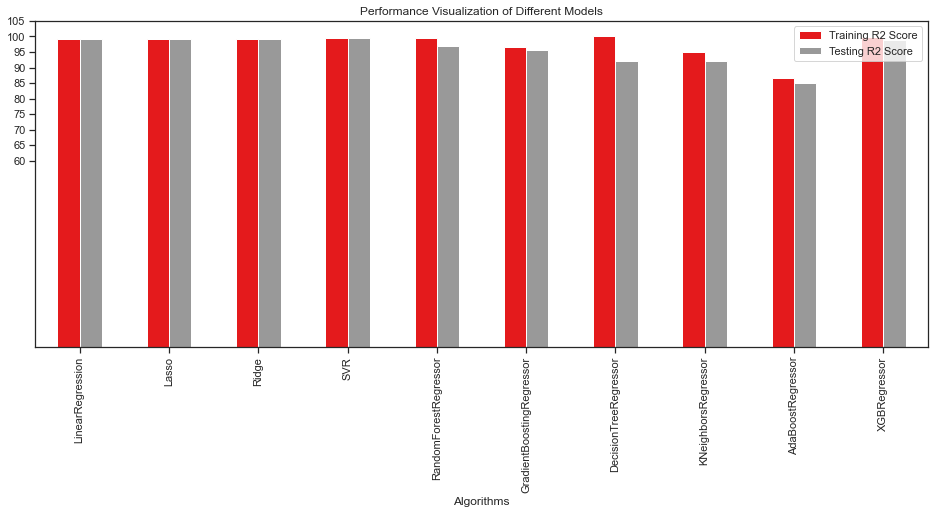

In [153]:
df5.plot(x="Algorithms",y=["Training R2 Score","Testing R2 Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set1")
plt.yticks(range(60,106,5))
plt.show()

In [154]:
from sklearn.model_selection import cross_val_score

In [155]:
num_folds_range = range(2,20)

model = LinearRegression()

fold_performance = {}

for num_folds in num_folds_range:
    scores = cross_val_score(model, x1, y1, cv=num_folds, scoring='neg_mean_squared_error')  # or 'r2' for coefficient of determination
    fold_performance[num_folds] = {
        'mean': np.mean(scores),
        'std': np.std(scores)
    }
    
df_fold_performance = pd.DataFrame(fold_performance).transpose()

print(df_fold_performance)

        mean       std
2  -0.065065  0.013752
3  -0.061830  0.020618
4  -0.059312  0.016431
5  -0.058550  0.024659
6  -0.058961  0.025428
7  -0.058875  0.028361
8  -0.057555  0.025522
9  -0.060179  0.027832
10 -0.059347  0.033907
11 -0.057281  0.033225
12 -0.058461  0.028623
13 -0.059842  0.033166
14 -0.060559  0.037228
15 -0.057204  0.028965
16 -0.058219  0.034924
17 -0.058926  0.039135
18 -0.058748  0.034972
19 -0.057636  0.030916


Best trade is cv 4

In [156]:
# checking cv score for logistic Regression
score = cross_val_score(LinearRegression(),x1,y1,cv=4)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[0]/100)- score.mean())

[0.99015983 0.98792041 0.9882894  0.99091832]
0.9893219906755635
Differnet between Accuracy score and cross validation score is-  0.0029703160006850915


In [157]:
# checking cv score for logistic Regression
score = cross_val_score(Lasso(),x1,y1,cv=4)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[1]/100)- score.mean())

[0.6098092  0.44248462 0.59471962 0.55292378]
0.5499843033658455
Differnet between Accuracy score and cross validation score is-  0.4423315861465992


In [158]:
# checking cv score for logistic Regression
score = cross_val_score(Ridge(),x1,y1,cv=4)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[2]/100)- score.mean())

[0.99020266 0.98782896 0.9882915  0.99093832]
0.9893153601807061
Differnet between Accuracy score and cross validation score is-  0.0029770592515864225


In [159]:
# checking cv score for logistic Regression
score = cross_val_score(SVR(),x1,y1,cv=4)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[3]/100)- score.mean())

[0.98716146 0.97317478 0.99097649 0.95364928]
0.9762405004183887
Differnet between Accuracy score and cross validation score is-  0.018909498315526574


In [160]:
# checking cv score for logistic Regression
score = cross_val_score(RandomForestRegressor(),x1,y1,cv=4)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[4]/100)- score.mean())

[0.90851578 0.85620663 0.95754653 0.95390201]
0.9190427377126452
Differnet between Accuracy score and cross validation score is-  0.05100755456182149


In [161]:
# checking cv score for logistic Regression
score = cross_val_score(GradientBoostingRegressor(),x1,y1, cv=4)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[5]/100)- score.mean())

[0.90310768 0.86054059 0.95366583 0.95946365]
0.9191944383468182
Differnet between Accuracy score and cross validation score is-  0.03606412347442289


In [162]:
# checking cv score for logistic Regression
score = cross_val_score(DecisionTreeRegressor(),x1,y1, cv=4)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[6]/100)- score.mean())

[0.83621142 0.80691875 0.91045898 0.91824044]
0.8679573985537172
Differnet between Accuracy score and cross validation score is-  0.052501340711705646


In [163]:
# checking cv score for logistic Regression
score = cross_val_score(KNeighborsRegressor(),x1,y1,cv=4)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[7]/100)- score.mean())

[0.68304267 0.65475693 0.82230725 0.84082506]
0.7502329779320511
Differnet between Accuracy score and cross validation score is-  0.17188561290509285


In [164]:
# checking cv score for logistic Regression
score = cross_val_score(AdaBoostRegressor(),x1,y1,cv=4)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[8]/100)- score.mean())

[0.73111818 0.74025924 0.84240249 0.86540719]
0.7947967734829864
Differnet between Accuracy score and cross validation score is-  0.05614785965986735


In [165]:
# checking cv score for logistic Regression
score = cross_val_score(XGBRegressor(),x1,y1,cv=4)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[9]/100)- score.mean())

[0.97241101 0.94816067 0.98537516 0.97811484]
0.9710154197475389
Differnet between Accuracy score and cross validation score is-  0.01858494093406382


XGBRegressor,SVR and ridge are best perfoming model with least difference

## Gridsearch CV

### Ridge

In [166]:
model1 = Ridge()

In [167]:
parameters1 ={'positive':[True,False],
             'solver':['auto', 'svd','cholesky','lsqr','sparse_cg', 'sag', 'saga', 'lbfgs'],
             'alpha':[0.02,0.04,0.2,0.3]
             }

In [168]:
grid_search = GridSearchCV(model1, param_grid=parameters1, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.02, 0.04, 0.2, 0.3],
                         'positive': [True, False],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga', 'lbfgs']})

In [169]:
grid_search.best_estimator_
best=grid_search.best_params_
best

{'alpha': 0.02, 'positive': False, 'solver': 'saga'}

In [170]:
model1=Ridge(alpha= 0.02, positive= False, solver= 'saga')

In [171]:
model1.fit(x_train,y_train)

x_test_pred1 = model1.predict(x_test)

r2_score(y_test,x_test_pred1)

0.992292539501685

### XGBRegressor

In [172]:
model2=XGBRegressor()

In [173]:
parameters2 ={'booster':['gbtree', 'gblinear', 'dart'],
             'learning_rate':[0.05,.01,.02],
             'disable_default_eval_metric':[True,False]
             }

In [174]:
grid_search = GridSearchCV(model2, param_grid=parameters2, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'booster': ['gbtree', 'gblinear', 'dart'],
                         'disable_default_eval_metric': [True, False],
                         'learning_rate': [0.05, 0.01, 0.02]})

In [175]:
grid_search.best_estimator_
best=grid_search.best_params_
best

{'booster': 'dart', 'disable_default_eval_metric': True, 'learning_rate': 0.05}

In [176]:
model2=XGBRegressor(booster= 'dart', disable_default_eval_metric= True, learning_rate= 0.05)

In [177]:
model2.fit(x_train,y_train)

x_test_pred2 = model2.predict(x_test)

r2_score(y_test,x_test_pred2)

0.9766896562294722

## Saving model

In [189]:
import pickle
filename='Min_temp.pkl'
pickle.dump(model1,open(filename,'wb'))#saved model

## Loading model

In [190]:
loaded_model1=pickle.load(open('Min_temp.pkl','rb'))
result=loaded_model1.score(x_test,y_test)
print(result*100)

99.2292539501685


In [191]:
conclusion1=pd.DataFrame([loaded_model1.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])
conclusion1

0          1          2          3          4          5     \
Predicted  20.399712  20.444942  21.685419  23.646685  22.162905  21.996595   
Original   20.500000  20.500000  21.800000  23.800000  22.300000  22.200000   

                6          7          8          9          10         11    \
Predicted  23.968492  22.208373  26.540595  26.132133  24.259967  23.334747   
Original   23.600000  22.300000  26.400000  26.300000  24.200000  23.100000   

                12        13         14         15         16         17    \
Predicted  21.521604  20.22516  20.425953  18.588038  24.530256  25.259911   
Original   21.600000  20.30000  20.400000  18.700000  24.500000  24.900000   

                18         19         20         21         22         23    \
Predicted  25.618323  24.842428  24.836935  21.503552  22.579964  22.318454   
Original   25.700000  24.800000  25.000000  21.800000  22.700000  22.500000   

                24         25         26         27         28         29    \
Predicted  18.862974  27.303831  25.979548  27.756828  18.152834  24.933133   
Original   19.000000  27.100000  26.100000  27.700000  18.100000  25.100000   

                30         31         32         33         34         35    \
Predicted  23.168355  23.488395  25.760766  22.882469  23.620163  25.912781   
Original   23.300000  23.800000  25.900000  23.000000  23.700000  26.000000   

                36         37         38         39         40        41    \
Predicted  23.520692  20.606102  20.669521  18.968868  22.395886  21.93224   
Original   23.800000  20.600000  19.900000  19.000000  22.500000  21.80000   

                42         43         44         45         46         47    \
Predicted  21.393191  21.897291  21.733033  21.163851  25.444288  24.012776   
Original   20.900000  22.100000  21.800000  21.100000  25.500000  23.900000   

                48         49         50        51         52         53    \
Predicted  24.949919  20.605866  24.298241  21.48215  20.993712  23.325135   
Original   25.000000  19.900000  24.600000  21.40000  21.200000  23.100000   

                54         55         56         57         58         59    \
Predicted  27.035582  21.748622  22.555486  20.898739  26.203752  19.657969   
Original   26.500000  21.900000  22.600000  20.400000  26.200000  19.700000   

                60         61         62         63        64        65    \
Predicted  20.437074  22.135775  22.938397  24.802524  25.31307  23.84235   
Original   20.600000  22.000000  22.900000  24.900000  25.40000  24.00000   

                66        67         68         69         70         71    \
Predicted  25.130683  20.65079  23.387944  24.117711  21.712121  20.278993   
Original   24.800000  20.70000  23.500000  24.200000  21.900000  20.400000   

                72         73         74         75         76         77    \
Predicted  24.766962  19.767913  23.483579  23.626901  24.524716  24.284542   
Original   24.500000  19.800000  23.500000  23.700000  24.500000  24.500000   

                78         79         80         81         82         83    \
Predicted  21.774736  19.386465  22.562899  23.459405  22.874801  25.512221   
Original   21.900000  19.300000  22.600000  23.600000  23.000000  25.500000   

                84         85         86         87         88         89    \
Predicted  22.812347  24.744916  26.267666  24.237551  22.451154  25.616078   
Original   22.900000  24.900000  25.900000  24.300000  22.500000  25.800000   

                90         91         92         93         94         95    \
Predicted  24.068382  21.152489  27.444079  23.331842  23.644104  24.208473   
Original   24.300000  21.300000  27.000000  23.500000  23.900000  24.100000   

                96        97         98         99         100       101   \
Predicted  24.390049  19.64821  22.323394  21.627971  21.231027  22.31069   
Original   24.400000  19.70000  22.500000  21.800000  21.200000  21.9000